In [1]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn nltk wordcloud textstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           f1_score, precision_score, recall_score, roc_auc_score, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# NLP imports
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import string
from wordcloud import WordCloud
import textstat

# Other imports
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import joblib
import pickle
from datetime import datetime
import time

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
print("✅ All libraries installed and imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")


✅ All libraries installed and imported successfully!
📊 Pandas version: 2.2.2


In [4]:
def create_sample_dataset():
    """Create a comprehensive sample dataset for demonstration"""

    categories = {
        'Data Science': [
            "Skills Programming Languages: Python pandas numpy scipy scikit-learn matplotlib SQL Java JavaScript Machine learning: Regression SVM Naive Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations: Mysql SqlServer Cassandra Hbase ElasticSearch D3.js DC.js Plotly kibana matplotlib ggplot Tableau Others: Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learning Education: Masters in Data Science 5 years experience Ernst Young LLP",

            "Data Scientist with 3+ years experience Python R SQL Tableau PowerBI machine learning deep learning statistical analysis predictive modeling time series forecasting A/B testing hypothesis testing data mining data visualization dashboard creation business intelligence KPI development stakeholder management cross-functional collaboration Masters Computer Science Stanford University Google Amazon Microsoft experience cloud computing AWS Azure big data spark hadoop",

            "Senior Data Analyst specializing healthcare analytics medical data HIPAA compliance clinical research biostatistics epidemiology survival analysis longitudinal data analysis pharmaceutical industry FDA regulations SAS SPSS R Python statistical consulting research methodology experimental design randomized controlled trials meta-analysis systematic review publication track record PhD Biostatistics Johns Hopkins 7 years experience",

            "Machine Learning Engineer MLOps model deployment production systems Docker Kubernetes CI/CD pipeline automation monitoring model versioning feature stores real-time inference batch processing distributed systems microservices architecture REST APIs database optimization query performance tuning data engineering ETL pipelines Apache Airflow data warehousing snowflake redshift big data technologies",

            "Research Scientist AI computer vision deep learning convolutional neural networks object detection image segmentation natural language processing transformer models BERT GPT attention mechanisms reinforcement learning policy gradient methods Q-learning deep Q networks multi-agent systems robotics control systems autonomous vehicles perception planning PhD Computer Science MIT publications top-tier conferences ICLR NIPS ICML"
        ],

        'Software Engineer': [
            "Full Stack Developer React Angular Vue.js Node.js Express.js JavaScript TypeScript HTML5 CSS3 responsive design mobile-first approach progressive web applications single page applications state management Redux MobX API development REST GraphQL microservices architecture serverless computing AWS Lambda cloud functions database design MongoDB PostgreSQL MySQL NoSQL Redis caching strategies performance optimization",

            "Backend Engineer Java Spring Boot Spring Framework Hibernate JPA RESTful web services microservices Docker containerization Kubernetes orchestration CI/CD Jenkins GitLab Maven Gradle unit testing integration testing test-driven development design patterns SOLID principles clean code architecture scalability performance tuning database optimization JVM tuning multithreading concurrent programming",

            "Frontend Developer modern JavaScript ES6+ React hooks context API state management component lifecycle responsive design CSS Grid Flexbox SASS LESS webpack Babel npm yarn package management browser APIs web performance optimization accessibility WCAG standards cross-browser compatibility mobile development React Native Ionic progressive enhancement user experience design",

            "DevOps Engineer infrastructure as code Terraform Ansible configuration management continuous integration continuous deployment pipeline automation monitoring logging ELK stack Prometheus Grafana containerization Docker Kubernetes cloud platforms AWS Azure GCP networking security compliance automation scripting Python Bash PowerShell incident response troubleshooting",

            "Mobile Developer iOS Swift Objective-C Xcode Interface Builder Core Data networking URLSession Grand Central Dispatch memory management ARC Auto Layout size classes adaptive layouts app store deployment TestFlight beta testing unit testing XCTest UI testing accessibility VoiceOver push notifications Core Location MapKit Core Animation performance optimization"
        ],

        'Product Manager': [
            "Product Manager 5+ years experience product strategy roadmap planning user research market analysis competitive intelligence feature prioritization stakeholder management cross-functional collaboration agile methodologies scrum product backlog management user stories acceptance criteria A/B testing data-driven decision making KPI tracking analytics Google Analytics Mixpanel product metrics user acquisition retention engagement",

            "Senior Product Manager B2B SaaS enterprise software product lifecycle management go-to-market strategy pricing strategy customer development user interviews product-market fit MVP development lean startup methodology design thinking user experience wireframing prototyping collaboration design teams engineering teams business stakeholders revenue optimization customer success product adoption",

            "Technical Product Manager API products developer tools platform products technical specifications requirements gathering system architecture understanding database design scalability performance security considerations integration challenges third-party APIs SDK development developer experience documentation technical writing engineering background computer science MBA product management certification",

            "Growth Product Manager user acquisition funnel optimization conversion rate optimization growth hacking experimentation framework statistical analysis cohort analysis retention analysis churn prediction lifetime value customer segmentation personalization recommendation systems viral mechanics referral programs social media marketing digital marketing SEO SEM content marketing",

            "Product Owner agile coach scrum master product backlog refinement sprint planning retrospectives stakeholder communication business analysis requirements elicitation user acceptance testing release planning change management training facilitation team leadership conflict resolution process improvement continuous delivery product quality assurance"
        ],

        'UX/UI Designer': [
            "UX Designer user experience design user research usability testing user interviews personas journey mapping wireframing prototyping interaction design information architecture navigation design responsive design mobile design accessibility design systems style guides brand guidelines color theory typography layout composition visual hierarchy user-centered design design thinking human-computer interaction psychology",

            "UI Designer visual design interface design mobile app design web design iconography illustration Adobe Creative Suite Photoshop Illustrator Sketch Figma InVision principle animation micro-interactions motion graphics brand identity logo design marketing materials social media graphics print design portfolio presentation client communication design process iteration feedback incorporation",

            "Product Designer end-to-end design process problem identification user research solution ideation concept development prototyping testing iteration launch support design system creation component library maintenance cross-functional collaboration product managers engineers stakeholders design leadership mentoring design strategy business impact measurement design metrics user satisfaction",

            "Design Researcher qualitative research quantitative research survey design interview techniques focus groups ethnographic studies behavioral analysis statistical analysis research methodology academic background psychology sociology anthropology research tools user testing platforms analytics interpretation insights generation recommendations evidence-based design data visualization research presentation",

            "Interaction Designer user interface design interactive prototypes animation timeline motion design state transitions feedback mechanisms error handling progressive disclosure onboarding flows task completion user flow optimization cognitive load reduction mental models usability principles accessibility guidelines platform guidelines iOS human interface guidelines Material Design"
        ],

        'Marketing Manager': [
            "Digital Marketing Manager SEO SEM Google Ads Facebook Ads LinkedIn Ads social media marketing content marketing email marketing marketing automation HubSpot Marketo Salesforce campaign management lead generation conversion optimization Google Analytics Adobe Analytics marketing metrics ROI measurement brand management influencer marketing affiliate marketing partnership marketing budget management team leadership",

            "Content Marketing Manager content strategy blog writing copywriting storytelling brand voice editorial calendar content distribution social media content video marketing podcast production SEO writing keyword research content optimization engagement metrics content performance analysis competitor analysis content planning editorial workflow content management systems WordPress content collaboration",

            "Growth Marketing Manager user acquisition customer acquisition cost lifetime value retention marketing viral marketing referral programs A/B testing conversion rate optimization funnel optimization marketing experiments statistical analysis cohort analysis customer segmentation personalization email marketing automation SMS marketing push notifications in-app messaging product marketing go-to-market strategy",

            "Brand Manager brand strategy brand positioning brand architecture brand guidelines visual identity messaging strategy brand campaigns integrated marketing campaigns traditional advertising digital advertising public relations crisis communication brand monitoring social listening brand metrics brand awareness brand equity market research consumer insights competitive analysis",

            "Performance Marketing Manager paid advertising campaign optimization bid management audience targeting lookalike audiences retargeting campaigns attribution modeling multi-touch attribution marketing mix modeling incrementality testing creative testing ad creative optimization landing page optimization conversion tracking pixel implementation tag management Google Tag Manager Facebook Pixel marketing analytics"
        ]
    }

    # Generate comprehensive dataset
    data = []
    for category, resumes in categories.items():
        for resume in resumes:
            data.append({
                'Category': category,
                'Resume': resume
            })

    # Add more variety to dataset
    for category in categories.keys():
        for i in range(10):  # Add 10 more varied samples per category
            # Create variations by combining elements
            base_resume = np.random.choice(categories[category])
            # Add some variation
            additional_skills = ["team leadership", "project management", "agile methodologies",
                               "client communication", "problem solving", "analytical thinking"]
            varied_resume = base_resume + " " + " ".join(np.random.choice(additional_skills, 3))

            data.append({
                'Category': category,
                'Resume': varied_resume
            })

    return pd.DataFrame(data)

# Load or create dataset
try:
    # Try to load from uploaded file first
    df = pd.read_csv('UpdatedResumeDataSet.csv')
    print("✅ Loaded dataset from uploaded file")
except:
    # Use sample dataset
    df = create_sample_dataset()
    print("✅ Created comprehensive sample dataset")

print(f"📊 Dataset shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")
print(f"🏷️ Categories: {df['Category'].nunique()}")

# Display first few rows
print("\n📖 First 3 rows:")
df.head(3)

✅ Created comprehensive sample dataset
📊 Dataset shape: (75, 2)
📋 Columns: ['Category', 'Resume']
🏷️ Categories: 5

📖 First 3 rows:


,Category,Resume
0,Data Science,Skills Programming Languages: Python pandas nu...
1,Data Science,Data Scientist with 3+ years experience Python...
2,Data Science,Senior Data Analyst specializing healthcare an...


In [5]:
print("📊 COMPREHENSIVE DATA EXPLORATION")
print("=" * 60)

# Basic dataset information
print("\n1. BASIC DATASET INFORMATION")
print("-" * 40)
print(f"Total number of resumes: {len(df):,}")
print(f"Number of categories: {df['Category'].nunique()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Missing values: {df.isnull().sum().sum()}")

# Category distribution
print("\n2. CATEGORY DISTRIBUTION")
print("-" * 40)
category_counts = df['Category'].value_counts()
print(category_counts)

# Statistical summary of text lengths
df['resume_length'] = df['Resume'].str.len()
df['word_count'] = df['Resume'].str.split().str.len()

print("\n3. TEXT LENGTH STATISTICS")
print("-" * 40)
print("Character Length Statistics:")
print(df['resume_length'].describe())
print("\nWord Count Statistics:")
print(df['word_count'].describe())

# Category-wise statistics
print("\n4. CATEGORY-WISE TEXT STATISTICS")
print("-" * 40)
category_stats = df.groupby('Category').agg({
    'resume_length': ['mean', 'std', 'min', 'max'],
    'word_count': ['mean', 'std', 'min', 'max']
}).round(2)
print(category_stats)

📊 COMPREHENSIVE DATA EXPLORATION

1. BASIC DATASET INFORMATION
----------------------------------------
Total number of resumes: 75
Number of categories: 5
Memory usage: 0.04 MB
Missing values: 0

2. CATEGORY DISTRIBUTION
----------------------------------------
Category
Data Science         15
Software Engineer    15
Product Manager      15
UX/UI Designer       15
Marketing Manager    15
Name: count, dtype: int64

3. TEXT LENGTH STATISTICS
----------------------------------------
Character Length Statistics:
count     75.000000
mean     445.920000
std       64.844879
min      348.000000
25%      412.500000
50%      437.000000
75%      465.000000
max      727.000000
Name: resume_length, dtype: float64

Word Count Statistics:
count    75.000000
mean     50.960000
std       9.701546
min      38.000000
25%      46.000000
50%      49.000000
75%      52.000000
max      94.000000
Name: word_count, dtype: float64

4. CATEGORY-WISE TEXT STATISTICS
----------------------------------------
     

In [6]:
print("🔍 ADVANCED TEXT ANALYSIS")
print("=" * 60)

# Extract additional text features
def extract_text_features(text):
    """Extract comprehensive text features"""
    if pd.isna(text):
        return {}

    # Basic counts
    char_count = len(text)
    word_count = len(text.split())
    sentence_count = len([s for s in text.split('.') if s.strip()])

    # Character analysis
    uppercase_count = sum(1 for c in text if c.isupper())
    digit_count = sum(1 for c in text if c.isdigit())
    special_char_count = sum(1 for c in text if c in string.punctuation)

    # Advanced metrics
    avg_word_length = np.mean([len(word) for word in text.split()]) if word_count > 0 else 0
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0

    # Readability metrics
    try:
        flesch_reading_ease = textstat.flesch_reading_ease(text)
        flesch_kincaid_grade = textstat.flesch_kincaid_grade(text)
        gunning_fog = textstat.gunning_fog(text)
    except:
        flesch_reading_ease = flesch_kincaid_grade = gunning_fog = 0

    return {
        'char_count': char_count,
        'word_count': word_count,
        'sentence_count': sentence_count,
        'uppercase_count': uppercase_count,
        'digit_count': digit_count,
        'special_char_count': special_char_count,
        'avg_word_length': avg_word_length,
        'avg_sentence_length': avg_sentence_length,
        'flesch_reading_ease': flesch_reading_ease,
        'flesch_kincaid_grade': flesch_kincaid_grade,
        'gunning_fog': gunning_fog
    }

# Extract features for all resumes
print("Extracting comprehensive text features...")
text_features = df['Resume'].apply(extract_text_features)
text_features_df = pd.DataFrame(text_features.tolist())

# Combine with original dataframe
df_enhanced = pd.concat([df, text_features_df], axis=1)

print("✅ Text feature extraction completed!")
print(f"📊 New features added: {len(text_features_df.columns)}")
print(f"🔧 Enhanced dataset shape: {df_enhanced.shape}")

# Display feature statistics
print("\n📈 TEXT FEATURE STATISTICS")
print("-" * 40)
feature_stats = text_features_df.describe().round(2)
print(feature_stats)

🔍 ADVANCED TEXT ANALYSIS
Extracting comprehensive text features...
✅ Text feature extraction completed!
📊 New features added: 11
🔧 Enhanced dataset shape: (75, 15)

📈 TEXT FEATURE STATISTICS
----------------------------------------
       char_count  word_count  sentence_count  uppercase_count  digit_count  \
count       75.00       75.00           75.00            75.00        75.00   
mean       445.92       50.96            1.16            20.41         0.40   
std         64.84        9.70            0.62            19.82         0.74   
min        348.00       38.00            1.00             2.00         0.00   
25%        412.50       46.00            1.00             6.00         0.00   
50%        437.00       49.00            1.00            12.00         0.00   
75%        465.00       52.00            1.00            30.00         1.00   
max        727.00       94.00            4.00            91.00         3.00   

       special_char_count  avg_word_length  avg_sentence

📊 COMPREHENSIVE DATA VISUALIZATION - PART 1


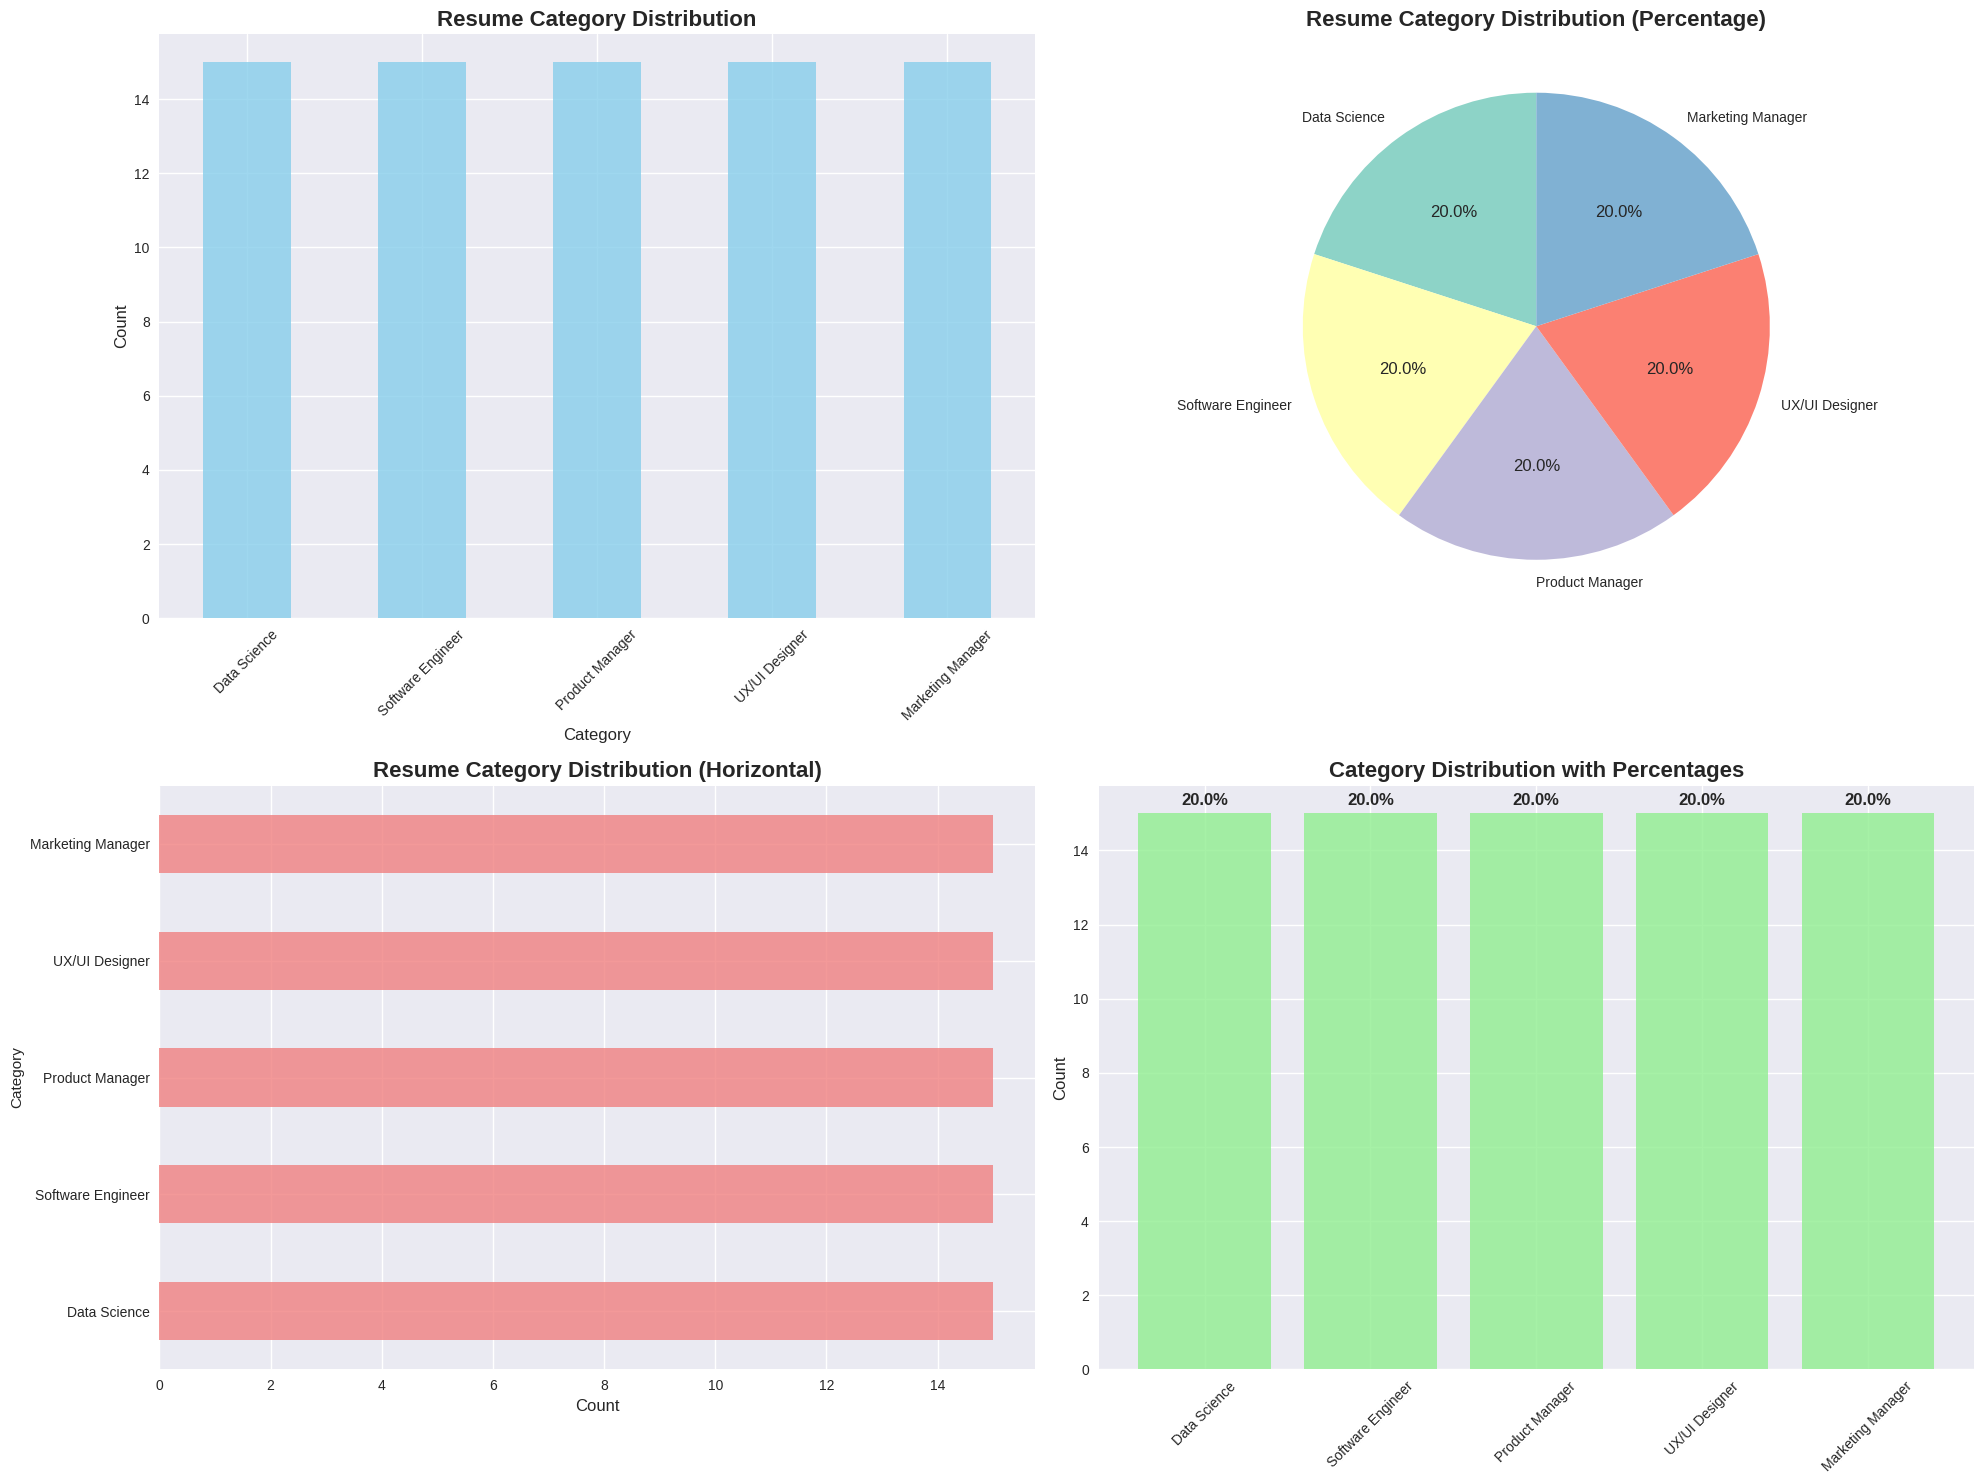

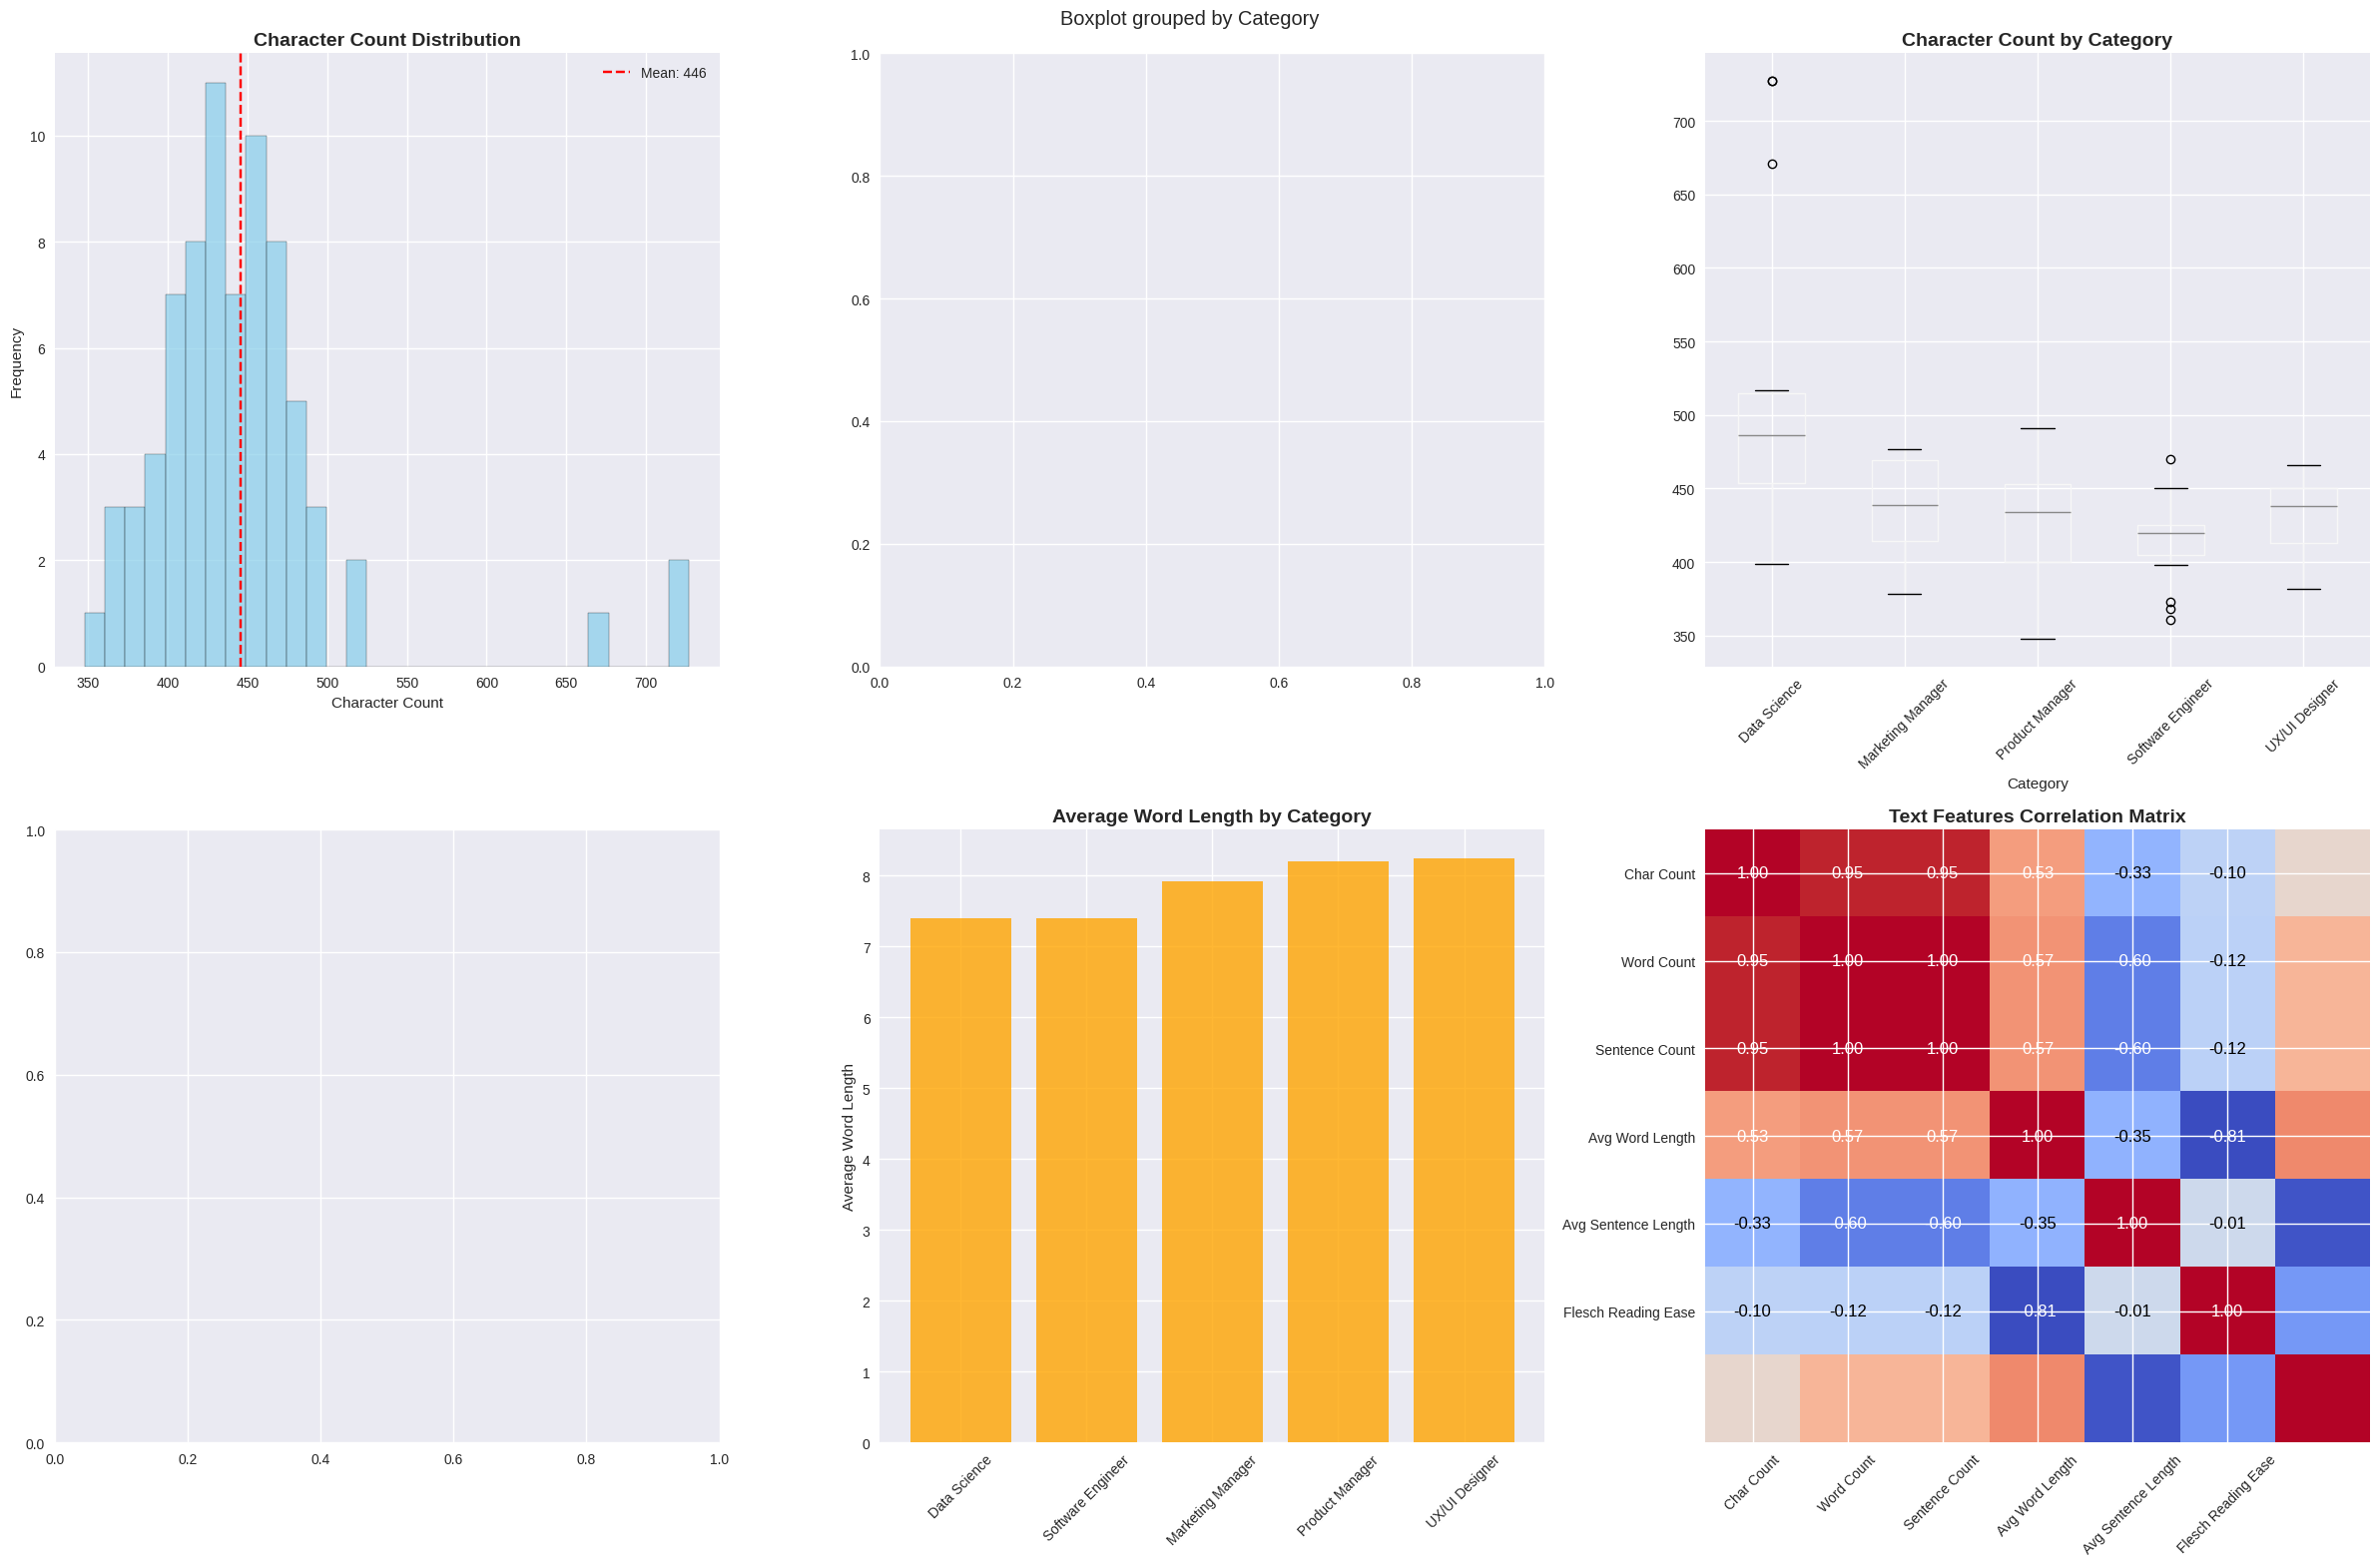

In [7]:
print("📊 COMPREHENSIVE DATA VISUALIZATION - PART 1")
print("=" * 60)

# Set up the plotting style
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

# 1. Category Distribution Visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Bar plot
category_counts.plot(kind='bar', ax=axes[0,0], color='skyblue', alpha=0.8)
axes[0,0].set_title('Resume Category Distribution', fontsize=16, fontweight='bold')
axes[0,0].set_xlabel('Category', fontsize=12)
axes[0,0].set_ylabel('Count', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=45)

# Pie chart
axes[0,1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
              startangle=90, colors=plt.cm.Set3.colors)
axes[0,1].set_title('Resume Category Distribution (Percentage)', fontsize=16, fontweight='bold')

# Horizontal bar plot
category_counts.plot(kind='barh', ax=axes[1,0], color='lightcoral', alpha=0.8)
axes[1,0].set_title('Resume Category Distribution (Horizontal)', fontsize=16, fontweight='bold')
axes[1,0].set_xlabel('Count', fontsize=12)

# Category counts with percentages
category_pct = (category_counts / category_counts.sum() * 100).round(1)
bars = axes[1,1].bar(range(len(category_counts)), category_counts.values, color='lightgreen', alpha=0.8)
axes[1,1].set_title('Category Distribution with Percentages', fontsize=16, fontweight='bold')
axes[1,1].set_xticks(range(len(category_counts)))
axes[1,1].set_xticklabels(category_counts.index, rotation=45)
axes[1,1].set_ylabel('Count', fontsize=12)

# Add percentage labels on bars
for i, (bar, pct) in enumerate(zip(bars, category_pct)):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{pct}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Text Length Analysis
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

# Character length distribution
axes[0,0].hist(df_enhanced['char_count'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Character Count Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Character Count')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df_enhanced['char_count'].mean(), color='red', linestyle='--',
                  label=f'Mean: {df_enhanced["char_count"].mean():.0f}')
axes[0,0].legend()



# Box plot for character count by category
df_enhanced.boxplot(column='char_count', by='Category', ax=axes[0,2])
axes[0,2].set_title('Character Count by Category', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Category')
axes[0,2].tick_params(axis='x', rotation=45)



# Average word length by category
avg_word_length_by_cat = df_enhanced.groupby('Category')['avg_word_length'].mean().sort_values()
axes[1,1].bar(range(len(avg_word_length_by_cat)), avg_word_length_by_cat.values,
              color='orange', alpha=0.8)
axes[1,1].set_title('Average Word Length by Category', fontsize=14, fontweight='bold')
axes[1,1].set_xticks(range(len(avg_word_length_by_cat)))
axes[1,1].set_xticklabels(avg_word_length_by_cat.index, rotation=45)
axes[1,1].set_ylabel('Average Word Length')

# Correlation heatmap of text features
text_feature_cols = ['char_count', 'word_count', 'sentence_count', 'avg_word_length',
                    'avg_sentence_length', 'flesch_reading_ease']
correlation_matrix = df_enhanced[text_feature_cols].corr()
im = axes[1,2].imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
axes[1,2].set_title('Text Features Correlation Matrix', fontsize=14, fontweight='bold')
axes[1,2].set_xticks(range(len(text_feature_cols)))
axes[1,2].set_yticks(range(len(text_feature_cols)))
axes[1,2].set_xticklabels([col.replace('_', ' ').title() for col in text_feature_cols], rotation=45)
axes[1,2].set_yticklabels([col.replace('_', ' ').title() for col in text_feature_cols])

# Add correlation values to heatmap
for i in range(len(text_feature_cols)):
    for j in range(len(text_feature_cols)):
        axes[1,2].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                      ha='center', va='center', color='white' if abs(correlation_matrix.iloc[i, j]) > 0.5 else 'black')

plt.tight_layout()
plt.show()

In [8]:
import nltk
nltk.download('punkt_tab')
print("🔤 NLP PREPROCESSING AND TEXT CLEANING")
print("=" * 60)

# Initialize NLP tools
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Add domain-specific stop words
domain_stop_words = {
    'experience', 'year', 'years', 'month', 'months', 'work', 'working', 'company',
    'role', 'position', 'job', 'team', 'project', 'projects', 'client', 'clients',
    'skill', 'skills', 'knowledge', 'understanding', 'ability', 'experience',
    'strong', 'good', 'excellent', 'proficient', 'expert', 'advanced', 'basic'
}
stop_words.update(domain_stop_words)

def advanced_text_preprocessing(text):
    """Comprehensive text preprocessing pipeline"""
    if pd.isna(text):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove phone numbers
    text = re.sub(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b', '', text)

    # Remove special characters but keep important ones
    text = re.sub(r'[^\w\s\+\#\.]', ' ', text)

    # Handle programming languages and technical terms
    # Keep + in C++, C#, etc.
    text = re.sub(r'\bc\+\+\b', 'cplusplus', text)
    text = re.sub(r'\bc#\b', 'csharp', text)
    text = re.sub(r'\.net\b', 'dotnet', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and short words
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

    # Remove tokens that are just numbers
    tokens = [token for token in tokens if not token.isdigit()]

    # Stemming
    tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)

def extract_technical_skills(text):
    """Extract technical skills and keywords"""
    if pd.isna(text):
        return []

    # Define skill patterns
    skill_patterns = {
        'programming_languages': [
            'python', 'java', 'javascript', 'typescript', 'c++', 'cplusplus', 'c#', 'csharp',
            'php', 'ruby', 'go', 'rust', 'kotlin', 'swift', 'scala', 'r', 'matlab', 'sas'
        ],
        'web_technologies': [
            'html', 'css', 'react', 'angular', 'vue', 'nodejs', 'express', 'django', 'flask',
            'spring', 'laravel', 'bootstrap', 'jquery', 'webpack', 'sass', 'less'
        ],
        'databases': [
            'mysql', 'postgresql', 'mongodb', 'redis', 'oracle', 'sqlserver', 'sqlite',
            'cassandra', 'elasticsearch', 'dynamodb', 'firebase', 'hbase'
        ],
        'cloud_platforms': [
            'aws', 'azure', 'gcp', 'docker', 'kubernetes', 'terraform', 'ansible',
            'jenkins', 'gitlab', 'circleci', 'heroku', 'digitalocean'
        ],
        'data_science': [
            'pandas', 'numpy', 'scikit-learn', 'tensorflow', 'pytorch', 'keras',
            'matplotlib', 'seaborn', 'plotly', 'tableau', 'powerbi', 'spark', 'hadoop'
        ],
        'tools': [
            'git', 'github', 'jira', 'confluence', 'slack', 'trello', 'figma', 'sketch',
            'photoshop', 'illustrator', 'excel', 'powerpoint', 'word'
        ]
    }

    text_lower = text.lower()
    found_skills = {}

    for category, skills in skill_patterns.items():
        found_skills[category] = [skill for skill in skills if skill in text_lower]

    return found_skills

def extract_experience_years(text):
    """Extract years of experience using multiple patterns"""
    if pd.isna(text):
        return 0

    patterns = [
        r'(\d+)\+?\s*(?:years?|yrs?)\s*(?:of\s*)?(?:experience|exp)',
        r'(?:experience|exp).*?(\d+)\+?\s*(?:years?|yrs?)',
        r'(\d+)\+?\s*(?:years?|yrs?)',
        r'over\s*(\d+)\s*(?:years?|yrs?)',
        r'more\s*than\s*(\d+)\s*(?:years?|yrs?)',
        r'(\d+)\+\s*(?:years?|yrs?)'
    ]

    text_lower = text.lower()
    max_experience = 0

    for pattern in patterns:
        matches = re.findall(pattern, text_lower)
        if matches:
            try:
                experience = max([int(match) for match in matches if match.isdigit()])
                max_experience = max(max_experience, experience)
            except:
                continue

    return min(max_experience, 50)  # Cap at 50 years

# Apply preprocessing
print("Applying comprehensive text preprocessing...")
start_time = time.time()

df_enhanced['processed_resume'] = df_enhanced['Resume'].apply(advanced_text_preprocessing)
df_enhanced['technical_skills'] = df_enhanced['Resume'].apply(extract_technical_skills)
df_enhanced['experience_years'] = df_enhanced['Resume'].apply(extract_experience_years)

# Extract skill counts
for skill_category in ['programming_languages', 'web_technologies', 'databases', 'cloud_platforms', 'data_science', 'tools']:
    df_enhanced[f'{skill_category}_count'] = df_enhanced['technical_skills'].apply(
        lambda x: len(x.get(skill_category, []))
    )

df_enhanced['total_skills'] = df_enhanced[['programming_languages_count', 'web_technologies_count',
                                         'databases_count', 'cloud_platforms_count',
                                         'data_science_count', 'tools_count']].sum(axis=1)

preprocessing_time = time.time() - start_time
print(f"✅ Preprocessing completed in {preprocessing_time:.2f} seconds")

# Display preprocessing results
print("\n📊 PREPROCESSING RESULTS")
print("-" * 40)
print(f"Average experience years: {df_enhanced['experience_years'].mean():.1f}")
print(f"Max experience years: {df_enhanced['experience_years'].max()}")
print(f"Average total skills: {df_enhanced['total_skills'].mean():.1f}")
print(f"Max total skills: {df_enhanced['total_skills'].max()}")

# Sample of processed data
print("\n📝 SAMPLE PROCESSED DATA")
print("-" * 40)
sample_idx = 0
print(f"Original: {df_enhanced.iloc[sample_idx]['Resume'][:200]}...")
print(f"Processed: {df_enhanced.iloc[sample_idx]['processed_resume'][:200]}...")
print(f"Experience: {df_enhanced.iloc[sample_idx]['experience_years']} years")
print(f"Total Skills: {df_enhanced.iloc[sample_idx]['total_skills']}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


🔤 NLP PREPROCESSING AND TEXT CLEANING
Applying comprehensive text preprocessing...
✅ Preprocessing completed in 0.32 seconds

📊 PREPROCESSING RESULTS
----------------------------------------
Average experience years: 0.8
Max experience years: 7
Average total skills: 4.3
Max total skills: 23

📝 SAMPLE PROCESSED DATA
----------------------------------------
Original: Skills Programming Languages: Python pandas numpy scipy scikit-learn matplotlib SQL Java JavaScript Machine learning: Regression SVM Naive Bayes KNN Random Forest Decision Trees Boosting techniques Cl...
Processed: program languag python panda numpi scipi scikit learn matplotlib sql java javascript machin learn regress svm naiv bay knn random forest decis tree boost techniqu cluster analysi word embed sentiment ...
Experience: 5 years
Total Skills: 23


In [1]:
print("🛠️ SKILLS ANALYSIS AND WORD CLOUDS")
print("=" * 60)

# Analyze skills by category
skills_by_category = {}
for category in df_enhanced['Category'].unique():
    category_data = df_enhanced[df_enhanced['Category'] == category]

    all_skills = []
    for skill_dict in category_data['technical_skills']:
        for skill_category, skills in skill_dict.items():
            all_skills.extend(skills)

    skills_by_category[category] = Counter(all_skills)

# Create skills analysis visualization
fig, axes = plt.subplots(3, 2, figsize=(24, 18))
axes = axes.flatten()

categories = list(skills_by_category.keys())
for i, category in enumerate(categories):
    if i < len(axes):
        # Top 15 skills for each category
        top_skills = dict(skills_by_category[category].most_common(15))

        if top_skills:
            skills_names = list(top_skills.keys())
            skills_counts = list(top_skills.values())

            bars = axes[i].bar(range(len(skills_names)), skills_counts,
                              color=plt.cm.Set3.colors[i % len(plt.cm.Set3.colors)], alpha=0.8)
            axes[i].set_title(f'Top Skills in {category}', fontsize=14, fontweight='bold')
            axes[i].set_xticks(range(len(skills_names)))
            axes[i].set_xticklabels(skills_names, rotation=45, ha='right')
            axes[i].set_ylabel('Frequency')

            # Add value labels on bars
            for bar, count in zip(bars, skills_counts):
                height = bar.get_height()
                axes[i].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                           f'{count}', ha='center', va='bottom', fontsize=10)

# Hide empty subplots
for i in range(len(categories), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Generate word clouds for each category
print("\n☁️ GENERATING WORD CLOUDS")
print("-" * 40)

fig, axes = plt.subplots(2, 3, figsize=(24, 16))
axes = axes.flatten()

for i, category in enumerate(categories):
    if i < len(axes):
        # Combine all processed text for this category
        category_text = ' '.join(df_enhanced[df_enhanced['Category'] == category]['processed_resume'])

        if category_text.strip():
            wordcloud = WordCloud(width=400, height=300,
                                background_color='white',
                                colormap='viridis',
                                max_words=100,
                                relative_scaling=0.5).generate(category_text)

            axes[i].imshow(wordcloud, interpolation='bilinear')
            axes[i].set_title(f'{category} - Word Cloud', fontsize=14, fontweight='bold')
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, 'No data available', ha='center', va='center',
                        transform=axes[i].transAxes, fontsize=12)
            axes[i].set_title(f'{category} - Word Cloud', fontsize=14, fontweight='bold')
            axes[i].axis('off')

# Hide empty subplots
for i in range(len(categories), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

🛠️ SKILLS ANALYSIS AND WORD CLOUDS


NameError: name 'df_enhanced' is not defined

In [10]:
duplicates = df_enhanced.columns[df_enhanced.columns.duplicated()]
print("Duplicate columns:", duplicates)


Duplicate columns: Index(['word_count'], dtype='object')


⚙️ FEATURE ENGINEERING AND ADVANCED ANALYTICS
Duplicate columns: ['word_count']
✅ Removed duplicate columns.
✅ Advanced features created!

📊 NEW FEATURE STATISTICS
----------------------------------------
text_complexity_score:
  Mean: 82.31
  Std: 10.01
  Min: 49.11
  Max: 97.53

skills_diversity:
  Mean: 1.79
  Std: 1.18
  Min: 1.00
  Max: 6.00

resume_quality_score:
  Mean: 2.77
  Std: 2.09
  Min: 1.33
  Max: 10.61

technical_depth:
  Mean: 7.88
  Std: 9.42
  Min: 2.00
  Max: 42.00

👨‍💼 EXPERIENCE LEVEL DISTRIBUTION
----------------------------------------
experience_level
Entry Level    63
Mid Level       9
Junior          3
Name: count, dtype: int64


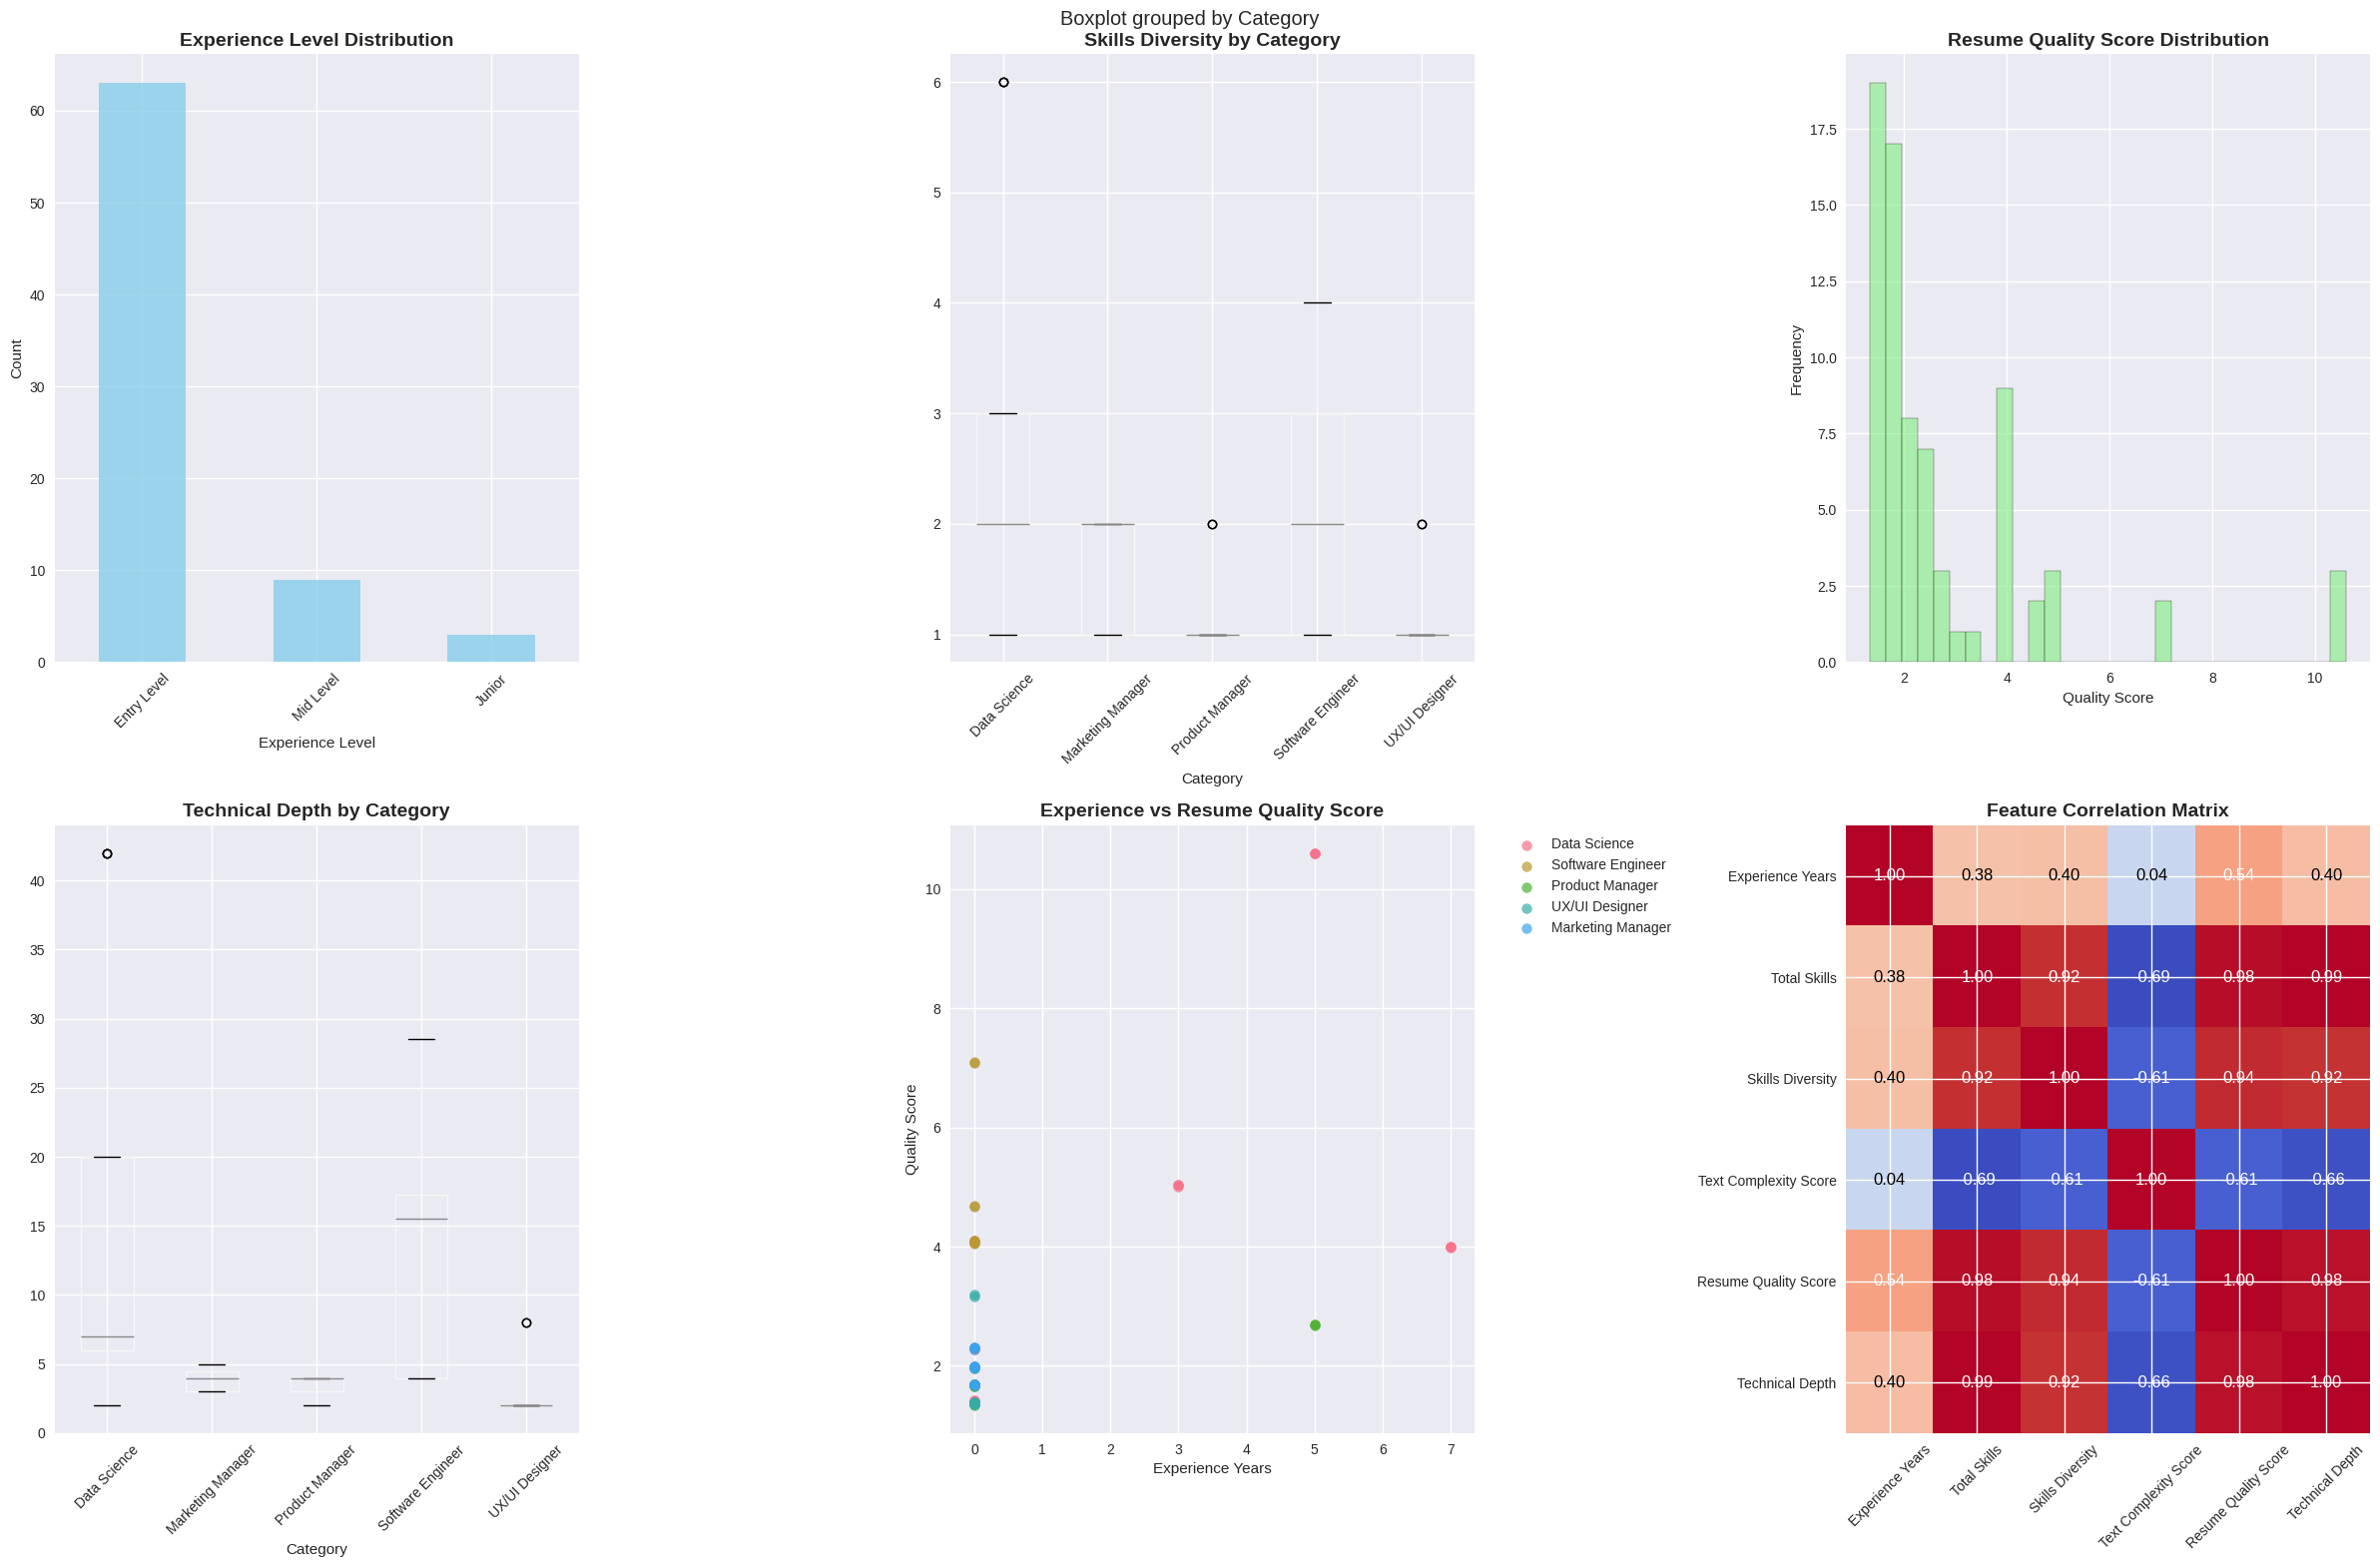

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("⚙️ FEATURE ENGINEERING AND ADVANCED ANALYTICS")
print("=" * 60)

# ----------------------------------------
# Step 1: Check and remove duplicate columns
# ----------------------------------------
duplicates = df_enhanced.columns[df_enhanced.columns.duplicated()]
print("Duplicate columns:", duplicates.tolist())

if len(duplicates) > 0:
    df_enhanced = df_enhanced.loc[:, ~df_enhanced.columns.duplicated()]
    print("✅ Removed duplicate columns.")

# ----------------------------------------
# Step 2: Define advanced feature engineering
# ----------------------------------------
def create_advanced_features(df):
    """Create advanced features for machine learning"""

    # Text complexity features
    df['text_complexity_score'] = (
        df['avg_word_length'] * 0.3 +
        df['avg_sentence_length'] * 0.3 +
        (100 - df['flesch_reading_ease']) * 0.4
    )

    # Professional experience level
    def categorize_experience(years):
        if years <= 1:
            return 'Entry Level'
        elif years <= 3:
            return 'Junior'
        elif years <= 7:
            return 'Mid Level'
        elif years <= 12:
            return 'Senior'
        else:
            return 'Expert'

    df['experience_level'] = df['experience_years'].apply(categorize_experience)

    # Skills diversity score
    df['skills_diversity'] = (
        (df['programming_languages_count'] > 0).astype(int) +
        (df['web_technologies_count'] > 0).astype(int) +
        (df['databases_count'] > 0).astype(int) +
        (df['cloud_platforms_count'] > 0).astype(int) +
        (df['data_science_count'] > 0).astype(int) +
        (df['tools_count'] > 0).astype(int)
    )

    # Resume quality score (composite metric)
    df['resume_quality_score'] = (
        np.log1p(df['word_count']) * 0.2 +
        df['total_skills'] * 0.3 +
        df['experience_years'] * 0.2 +
        df['skills_diversity'] * 0.3
    )

    # Technical depth score
    df['technical_depth'] = (
        df['programming_languages_count'] * 2 +
        df['web_technologies_count'] * 1.5 +
        df['databases_count'] * 1.5 +
        df['cloud_platforms_count'] * 2 +
        df['data_science_count'] * 2.5 +
        df['tools_count'] * 1
    )

    return df

# ----------------------------------------
# Step 3: Apply feature engineering
# ----------------------------------------
df_enhanced = create_advanced_features(df_enhanced)
print("✅ Advanced features created!")

# ----------------------------------------
# Step 4: Analyze new features
# ----------------------------------------
print("\n📊 NEW FEATURE STATISTICS")
print("-" * 40)
new_features = ['text_complexity_score', 'skills_diversity', 'resume_quality_score', 'technical_depth']
for feature in new_features:
    print(f"{feature}:")
    print(f"  Mean: {df_enhanced[feature].mean():.2f}")
    print(f"  Std: {df_enhanced[feature].std():.2f}")
    print(f"  Min: {df_enhanced[feature].min():.2f}")
    print(f"  Max: {df_enhanced[feature].max():.2f}")
    print()

# Experience level distribution
print("👨‍💼 EXPERIENCE LEVEL DISTRIBUTION")
print("-" * 40)
exp_level_counts = df_enhanced['experience_level'].value_counts()
print(exp_level_counts)

# ----------------------------------------
# Step 5: Visualizations
# ----------------------------------------
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

# Experience level distribution
exp_level_counts.plot(kind='bar', ax=axes[0,0], color='skyblue', alpha=0.8)
axes[0,0].set_title('Experience Level Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Experience Level')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

# Skills diversity by category
df_enhanced.boxplot(column='skills_diversity', by='Category', ax=axes[0,1])
axes[0,1].set_title('Skills Diversity by Category', fontsize=14, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)

# Resume quality score distribution
axes[0,2].hist(df_enhanced['resume_quality_score'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,2].set_title('Resume Quality Score Distribution', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Quality Score')
axes[0,2].set_ylabel('Frequency')

# Technical depth by category
df_enhanced.boxplot(column='technical_depth', by='Category', ax=axes[1,0])
axes[1,0].set_title('Technical Depth by Category', fontsize=14, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# Experience vs Quality Score
for i, category in enumerate(df_enhanced['Category'].unique()):
    cat_data = df_enhanced[df_enhanced['Category'] == category]
    axes[1,1].scatter(cat_data['experience_years'], cat_data['resume_quality_score'],
                      label=category, alpha=0.7, s=50)
axes[1,1].set_title('Experience vs Resume Quality Score', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Experience Years')
axes[1,1].set_ylabel('Quality Score')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Correlation heatmap of all features
feature_cols = ['experience_years', 'total_skills', 'skills_diversity',
                'text_complexity_score', 'resume_quality_score', 'technical_depth']
correlation_matrix = df_enhanced[feature_cols].corr()
im = axes[1,2].imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
axes[1,2].set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
axes[1,2].set_xticks(range(len(feature_cols)))
axes[1,2].set_yticks(range(len(feature_cols)))
axes[1,2].set_xticklabels([col.replace('_', ' ').title() for col in feature_cols], rotation=45)
axes[1,2].set_yticklabels([col.replace('_', ' ').title() for col in feature_cols])

# Add correlation values
for i in range(len(feature_cols)):
    for j in range(len(feature_cols)):
        axes[1,2].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha='center', va='center',
                       color='white' if abs(correlation_matrix.iloc[i, j]) > 0.5 else 'black')

plt.tight_layout()
plt.show()


In [12]:
print("🔤 TEXT VECTORIZATION AND SIMILARITY ANALYSIS")
print("=" * 60)

# Initialize vectorizers
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95
)

count_vectorizer = CountVectorizer(
    max_features=3000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95
)

# Fit vectorizers
print("Fitting TF-IDF vectorizer...")
tfidf_matrix = tfidf_vectorizer.fit_transform(df_enhanced['processed_resume'])

print("Fitting Count vectorizer...")
count_matrix = count_vectorizer.fit_transform(df_enhanced['processed_resume'])

print(f"✅ TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"✅ Count matrix shape: {count_matrix.shape}")

# Analyze most important features
print("\n📊 MOST IMPORTANT TF-IDF FEATURES")
print("-" * 40)
feature_names = tfidf_vectorizer.get_feature_names_out()
mean_scores = np.array(tfidf_matrix.mean(axis=0)).flatten()
top_features_idx = mean_scores.argsort()[-20:][::-1]

for i, idx in enumerate(top_features_idx):
    print(f"{i+1:2d}. {feature_names[idx]:20s} (score: {mean_scores[idx]:.4f})")

# Category-specific TF-IDF analysis
print("\n📊 CATEGORY-SPECIFIC TF-IDF FEATURES")
print("-" * 40)

for category in df_enhanced['Category'].unique():
    print(f"\nTop features for {category}:")
    category_mask = df_enhanced['Category'] == category
    category_tfidf = tfidf_matrix[category_mask.values]
    category_mean_scores = np.array(category_tfidf.mean(axis=0)).flatten()
    category_top_idx = category_mean_scores.argsort()[-10:][::-1]

    for i, idx in enumerate(category_top_idx):
        print(f"  {i+1:2d}. {feature_names[idx]:20s} (score: {category_mean_scores[idx]:.4f})")

# Similarity analysis
print("\n🔍 RESUME SIMILARITY ANALYSIS")
print("-" * 40)

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

# Find most similar resume pairs
similarity_scores = []
n_resumes = len(df_enhanced)

for i in range(n_resumes):
    for j in range(i+1, n_resumes):
        similarity_scores.append({
            'resume_1': i,
            'resume_2': j,
            'category_1': df_enhanced.iloc[i]['Category'],
            'category_2': df_enhanced.iloc[j]['Category'],
            'similarity': similarity_matrix[i, j]
        })

similarity_df = pd.DataFrame(similarity_scores)

# Top 10 most similar resume pairs
print("Top 10 most similar resume pairs:")
top_similar = similarity_df.nlargest(10, 'similarity')
for idx, row in top_similar.iterrows():
    same_category = "✓" if row['category_1'] == row['category_2'] else "✗"
    print(f"Resumes {row['resume_1']:2d} & {row['resume_2']:2d}: {row['similarity']:.4f} "
          f"({row['category_1']} vs {row['category_2']}) Same category: {same_category}")

# Average similarity within and between categories
print("\n📊 AVERAGE SIMILARITY ANALYSIS")
print("-" * 40)
same_category_similarities = similarity_df[
    similarity_df['category_1'] == similarity_df['category_2']
]['similarity']

different_category_similarities = similarity_df[
    similarity_df['category_1'] != similarity_df['category_2']
]['similarity']

print(f"Average similarity within same category: {same_category_similarities.mean():.4f}")
print(f"Average similarity between different categories: {different_category_similarities.mean():.4f}")
print(f"Difference: {same_category_similarities.mean() - different_category_similarities.mean():.4f}")

🔤 TEXT VECTORIZATION AND SIMILARITY ANALYSIS
Fitting TF-IDF vectorizer...
Fitting Count vectorizer...
✅ TF-IDF matrix shape: (75, 1544)
✅ Count matrix shape: (75, 1544)

📊 MOST IMPORTANT TF-IDF FEATURES
----------------------------------------
 1. design               (score: 0.0709)
 2. market               (score: 0.0702)
 3. manag                (score: 0.0519)
 4. product              (score: 0.0511)
 5. brand                (score: 0.0429)
 6. research             (score: 0.0426)
 7. user                 (score: 0.0385)
 8. analysi              (score: 0.0367)
 9. data                 (score: 0.0356)
10. test                 (score: 0.0355)
11. analyt               (score: 0.0337)
12. develop              (score: 0.0326)
13. optim                (score: 0.0291)
14. methodolog           (score: 0.0291)
15. leadership           (score: 0.0270)
16. learn                (score: 0.0250)
17. think                (score: 0.0249)
18. agil                 (score: 0.0240)
19. content       

In [13]:
print("🤖 MACHINE LEARNING MODEL PREPARATION")
print("=" * 60)

# Prepare features and target
print("Preparing features and target variables...")

# Text features (TF-IDF)
X_text = tfidf_matrix

# Numerical features
numerical_features = [
    'experience_years', 'total_skills', 'skills_diversity',
    'text_complexity_score', 'resume_quality_score', 'technical_depth',
    'word_count', 'char_count', 'avg_word_length'
]

X_numerical = df_enhanced[numerical_features].values

# Combine features
from scipy.sparse import hstack
X_combined = hstack([X_text, X_numerical])

# Target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_enhanced['Category'])

print(f"✅ Feature matrix shape: {X_combined.shape}")
print(f"✅ Target vector shape: {y.shape}")
print(f"✅ Number of classes: {len(label_encoder.classes_)}")
print(f"✅ Classes: {list(label_encoder.classes_)}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 DATA SPLIT INFORMATION")
print("-" * 40)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training set distribution:")
train_counts = pd.Series(y_train).value_counts().sort_index()
for i, count in enumerate(train_counts):
    print(f"  {label_encoder.classes_[i]}: {count} ({count/len(y_train)*100:.1f}%)")

print(f"\nTest set distribution:")
test_counts = pd.Series(y_test).value_counts().sort_index()
for i, count in enumerate(test_counts):
    print(f"  {label_encoder.classes_[i]}: {count} ({count/len(y_test)*100:.1f}%)")


🤖 MACHINE LEARNING MODEL PREPARATION
Preparing features and target variables...
✅ Feature matrix shape: (75, 1553)
✅ Target vector shape: (75,)
✅ Number of classes: 5
✅ Classes: ['Data Science', 'Marketing Manager', 'Product Manager', 'Software Engineer', 'UX/UI Designer']

📊 DATA SPLIT INFORMATION
----------------------------------------
Training set size: 60
Test set size: 15
Training set distribution:
  Data Science: 12 (20.0%)
  Marketing Manager: 12 (20.0%)
  Product Manager: 12 (20.0%)
  Software Engineer: 12 (20.0%)
  UX/UI Designer: 12 (20.0%)

Test set distribution:
  Data Science: 3 (20.0%)
  Marketing Manager: 3 (20.0%)
  Product Manager: 3 (20.0%)
  Software Engineer: 3 (20.0%)
  UX/UI Designer: 3 (20.0%)


In [14]:
print("🏋️ MODEL TRAINING - 5 DIFFERENT ALGORITHMS")
print("=" * 60)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, C=1.0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20),
    'SVM': SVC(kernel='rbf', random_state=42, probability=True, C=1.0, gamma='scale'),
    'Naive Bayes': MultinomialNB(alpha=1.0),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=6)
}

# Training results storage
training_results = {}
model_objects = {}

# Train each model
for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    start_time = time.time()

    # Train model
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Store results
    training_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'training_time': training_time,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    }

    model_objects[name] = model

    print(f"  ✅ Accuracy: {accuracy:.4f}")
    print(f"  ✅ F1-Score: {f1:.4f}")
    print(f"  ✅ Training time: {training_time:.2f}s")
    print(f"  ✅ CV Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

print("\n🎉 All models trained successfully!")


🏋️ MODEL TRAINING - 5 DIFFERENT ALGORITHMS

🔄 Training Logistic Regression...
  ✅ Accuracy: 0.8667
  ✅ F1-Score: 0.8648
  ✅ Training time: 8.58s
  ✅ CV Score: 0.7333 ± 0.0972

🔄 Training Random Forest...
  ✅ Accuracy: 1.0000
  ✅ F1-Score: 1.0000
  ✅ Training time: 0.23s
  ✅ CV Score: 0.9333 ± 0.0624

🔄 Training SVM...
  ✅ Accuracy: 0.4667
  ✅ F1-Score: 0.4022
  ✅ Training time: 0.02s
  ✅ CV Score: 0.2167 ± 0.0408

🔄 Training Naive Bayes...
  ✅ Accuracy: 0.5333
  ✅ F1-Score: 0.4314
  ✅ Training time: 0.00s
  ✅ CV Score: 0.2667 ± 0.0972

🔄 Training Gradient Boosting...
  ✅ Accuracy: 1.0000
  ✅ F1-Score: 1.0000
  ✅ Training time: 1.05s
  ✅ CV Score: 0.9833 ± 0.0333

🎉 All models trained successfully!


📊 COMPREHENSIVE MODEL EVALUATION AND COMPARISON
📈 MODEL PERFORMANCE COMPARISON
----------------------------------------
              Model  Accuracy  Precision  Recall  F1-Score  CV Mean  CV Std  Training Time (s)
Logistic Regression    0.8667     0.8833  0.8667    0.8648   0.7333  0.0972             8.5820
      Random Forest    1.0000     1.0000  1.0000    1.0000   0.9333  0.0624             0.2273
                SVM    0.4667     0.4667  0.4667    0.4022   0.2167  0.0408             0.0193
        Naive Bayes    0.5333     0.4167  0.5333    0.4314   0.2667  0.0972             0.0012
  Gradient Boosting    1.0000     1.0000  1.0000    1.0000   0.9833  0.0333             1.0532

🏆 BEST PERFORMERS
----------------------------------------
Best Accuracy: Random Forest (1.0000)
Best F1-Score: Random Forest (1.0000)
Fastest Training: Naive Bayes (0.00s)


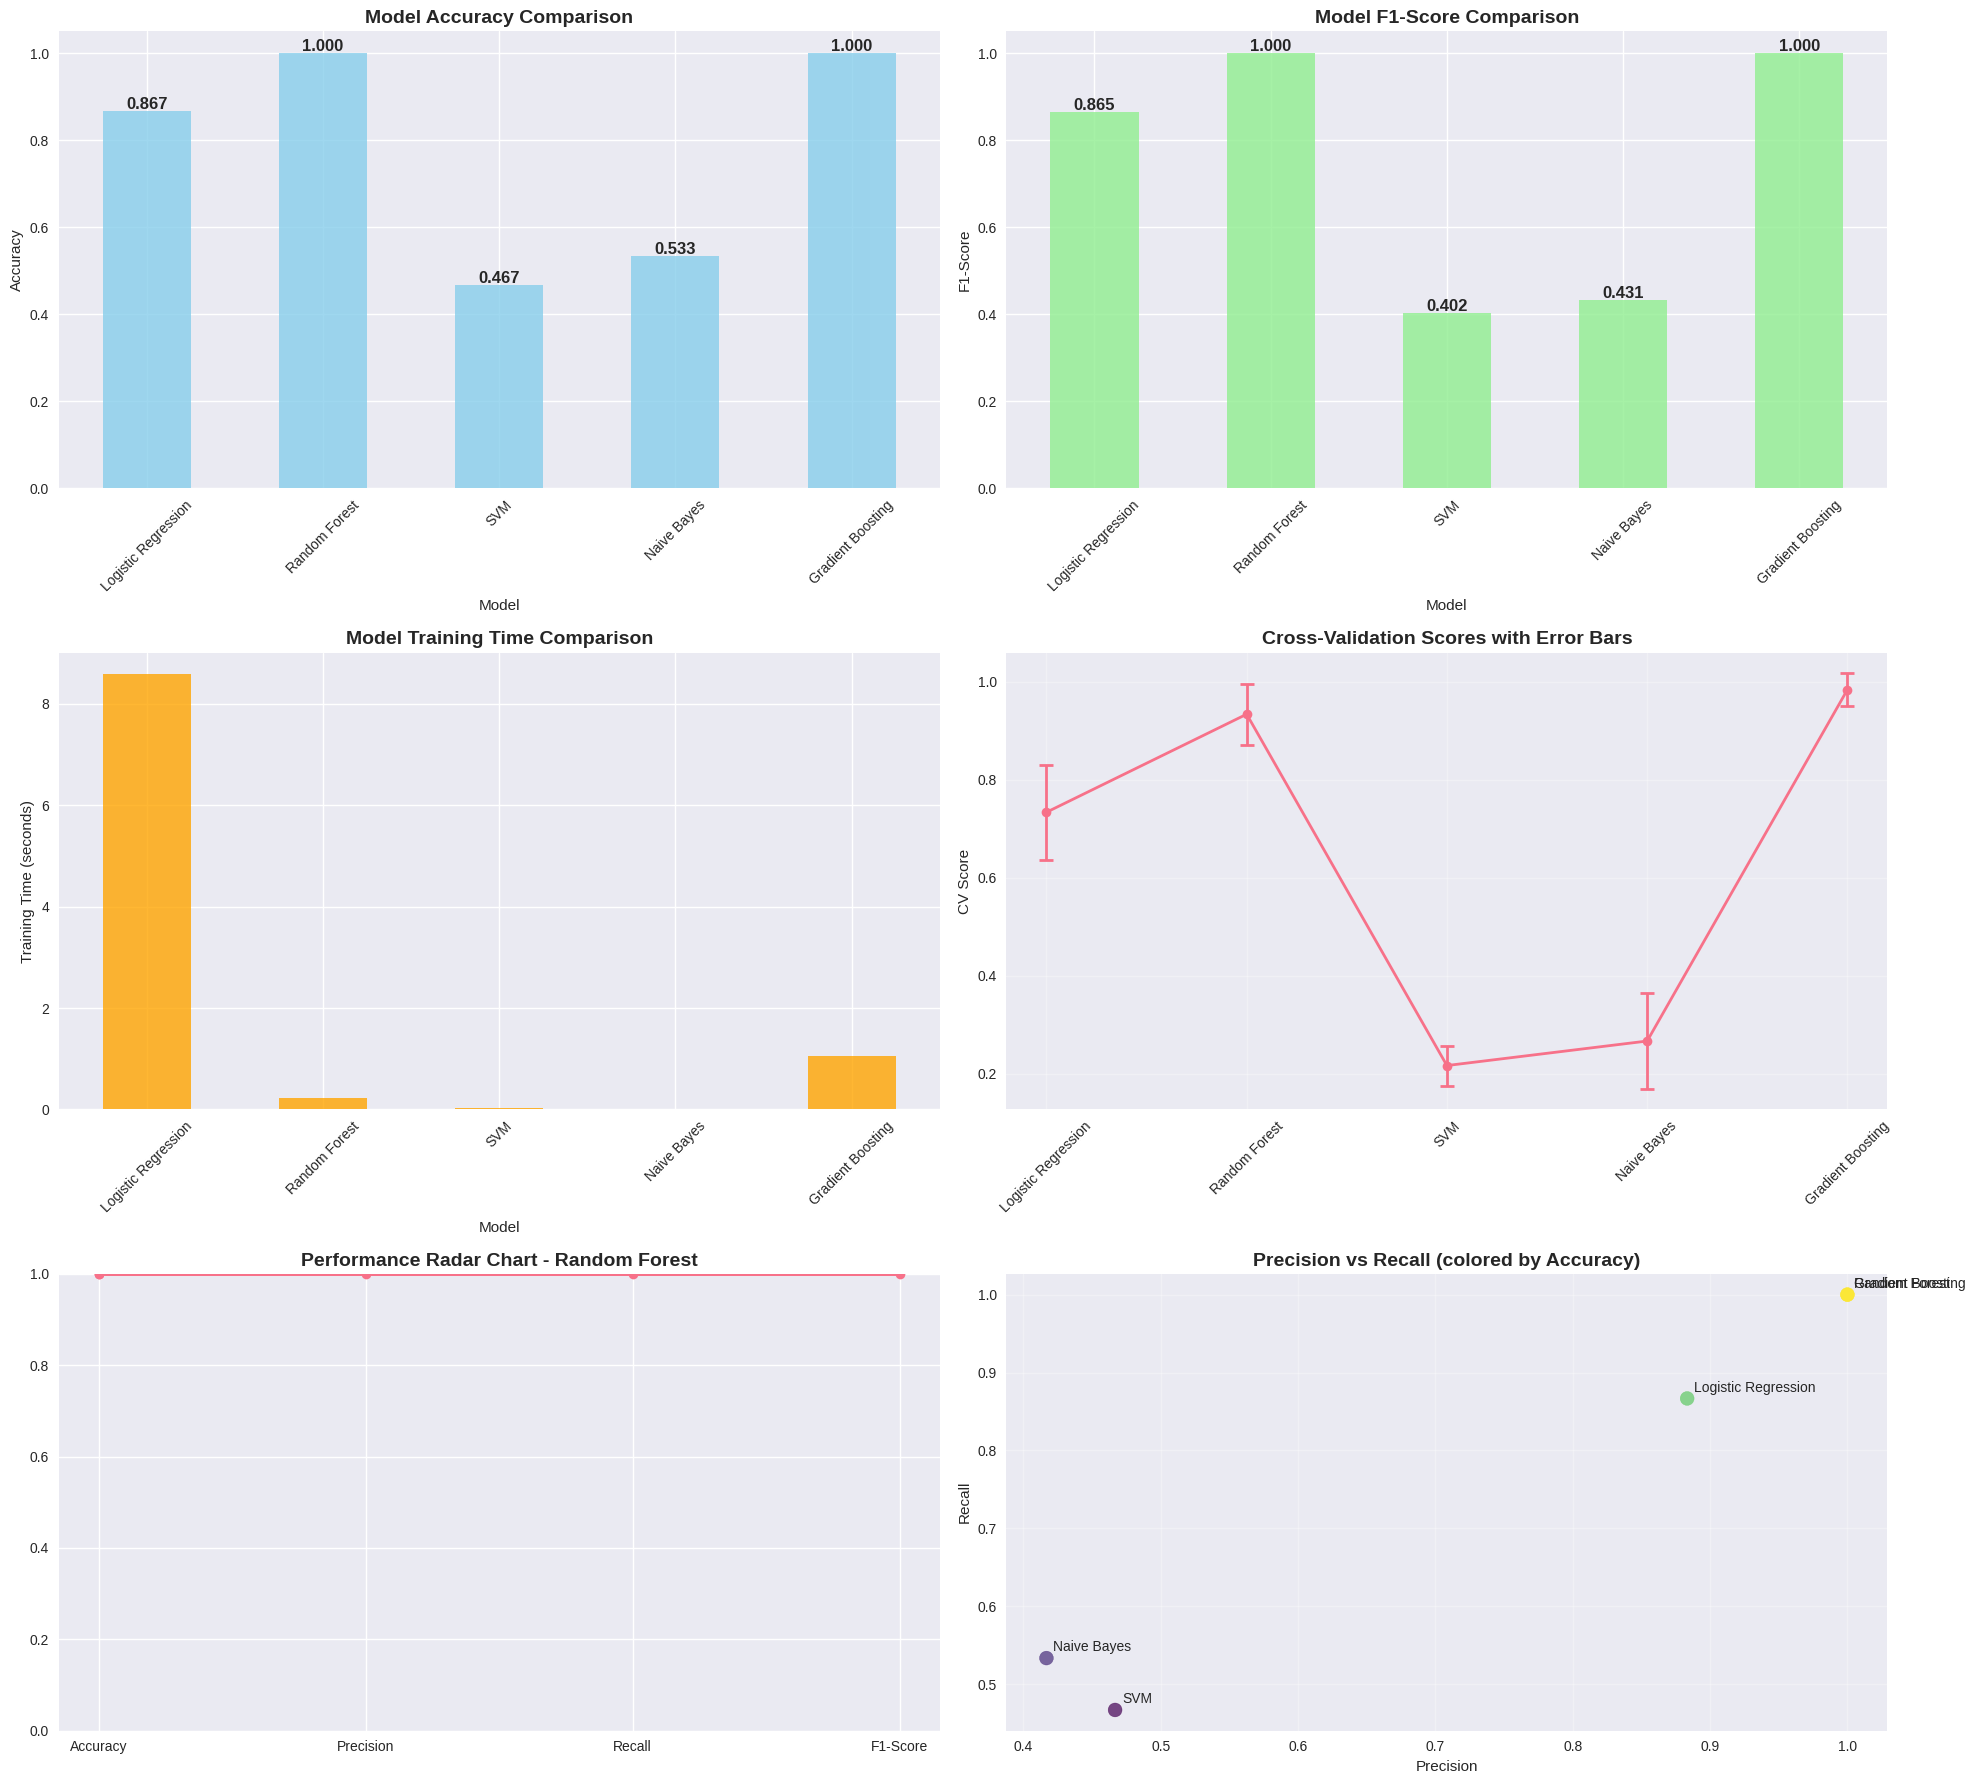

In [15]:
print("📊 COMPREHENSIVE MODEL EVALUATION AND COMPARISON")
print("=" * 60)

# Create comparison dataframe
comparison_data = []
for name, results in training_results.items():
    comparison_data.append({
        'Model': name,
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1-Score': results['f1_score'],
        'CV Mean': results['cv_mean'],
        'CV Std': results['cv_std'],
        'Training Time (s)': results['training_time']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("📈 MODEL PERFORMANCE COMPARISON")
print("-" * 40)
print(comparison_df.to_string(index=False))

# Find best models
best_accuracy = comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Model']
best_f1 = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
fastest = comparison_df.loc[comparison_df['Training Time (s)'].idxmin(), 'Model']

print(f"\n🏆 BEST PERFORMERS")
print("-" * 40)
print(f"Best Accuracy: {best_accuracy} ({comparison_df['Accuracy'].max():.4f})")
print(f"Best F1-Score: {best_f1} ({comparison_df['F1-Score'].max():.4f})")
print(f"Fastest Training: {fastest} ({comparison_df['Training Time (s)'].min():.2f}s)")

# Detailed visualization
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# 1. Accuracy comparison
comparison_df.plot(x='Model', y='Accuracy', kind='bar', ax=axes[0,0],
                  color='skyblue', alpha=0.8, legend=False)
axes[0,0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0,0].text(i, v + 0.005, f'{v:.3f}', ha='center', fontweight='bold')

# 2. F1-Score comparison
comparison_df.plot(x='Model', y='F1-Score', kind='bar', ax=axes[0,1],
                  color='lightgreen', alpha=0.8, legend=False)
axes[0,1].set_title('Model F1-Score Comparison', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(comparison_df['F1-Score']):
    axes[0,1].text(i, v + 0.005, f'{v:.3f}', ha='center', fontweight='bold')

# 3. Training time comparison
comparison_df.plot(x='Model', y='Training Time (s)', kind='bar', ax=axes[1,0],
                  color='orange', alpha=0.8, legend=False)
axes[1,0].set_title('Model Training Time Comparison', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Training Time (seconds)')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Cross-validation scores with error bars
models_list = comparison_df['Model'].tolist()
cv_means = comparison_df['CV Mean'].tolist()
cv_stds = comparison_df['CV Std'].tolist()

axes[1,1].errorbar(range(len(models_list)), cv_means, yerr=cv_stds,
                   marker='o', capsize=5, capthick=2, linewidth=2)
axes[1,1].set_title('Cross-Validation Scores with Error Bars', fontsize=14, fontweight='bold')
axes[1,1].set_xticks(range(len(models_list)))
axes[1,1].set_xticklabels(models_list, rotation=45)
axes[1,1].set_ylabel('CV Score')
axes[1,1].grid(True, alpha=0.3)

# 5. Multi-metric radar chart for best model
best_model_data = comparison_df[comparison_df['Model'] == best_accuracy].iloc[0]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [best_model_data[metric] for metric in metrics]

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
values += values[:1]  # Complete the circle
angles += angles[:1]

axes[2,0].plot(angles, values, 'o-', linewidth=2, label=best_accuracy)
axes[2,0].fill(angles, values, alpha=0.25)
axes[2,0].set_xticks(angles[:-1])
axes[2,0].set_xticklabels(metrics)
axes[2,0].set_ylim(0, 1)
axes[2,0].set_title(f'Performance Radar Chart - {best_accuracy}', fontsize=14, fontweight='bold')
axes[2,0].grid(True)

# 6. Precision vs Recall scatter plot
axes[2,1].scatter(comparison_df['Precision'], comparison_df['Recall'],
                 s=100, alpha=0.7, c=comparison_df['Accuracy'], cmap='viridis')
for i, model in enumerate(comparison_df['Model']):
    axes[2,1].annotate(model, (comparison_df.iloc[i]['Precision'], comparison_df.iloc[i]['Recall']),
                      xytext=(5, 5), textcoords='offset points', fontsize=10)
axes[2,1].set_xlabel('Precision')
axes[2,1].set_ylabel('Recall')
axes[2,1].set_title('Precision vs Recall (colored by Accuracy)', fontsize=14, fontweight='bold')
axes[2,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

📊 CONFUSION MATRICES AND CLASSIFICATION REPORTS


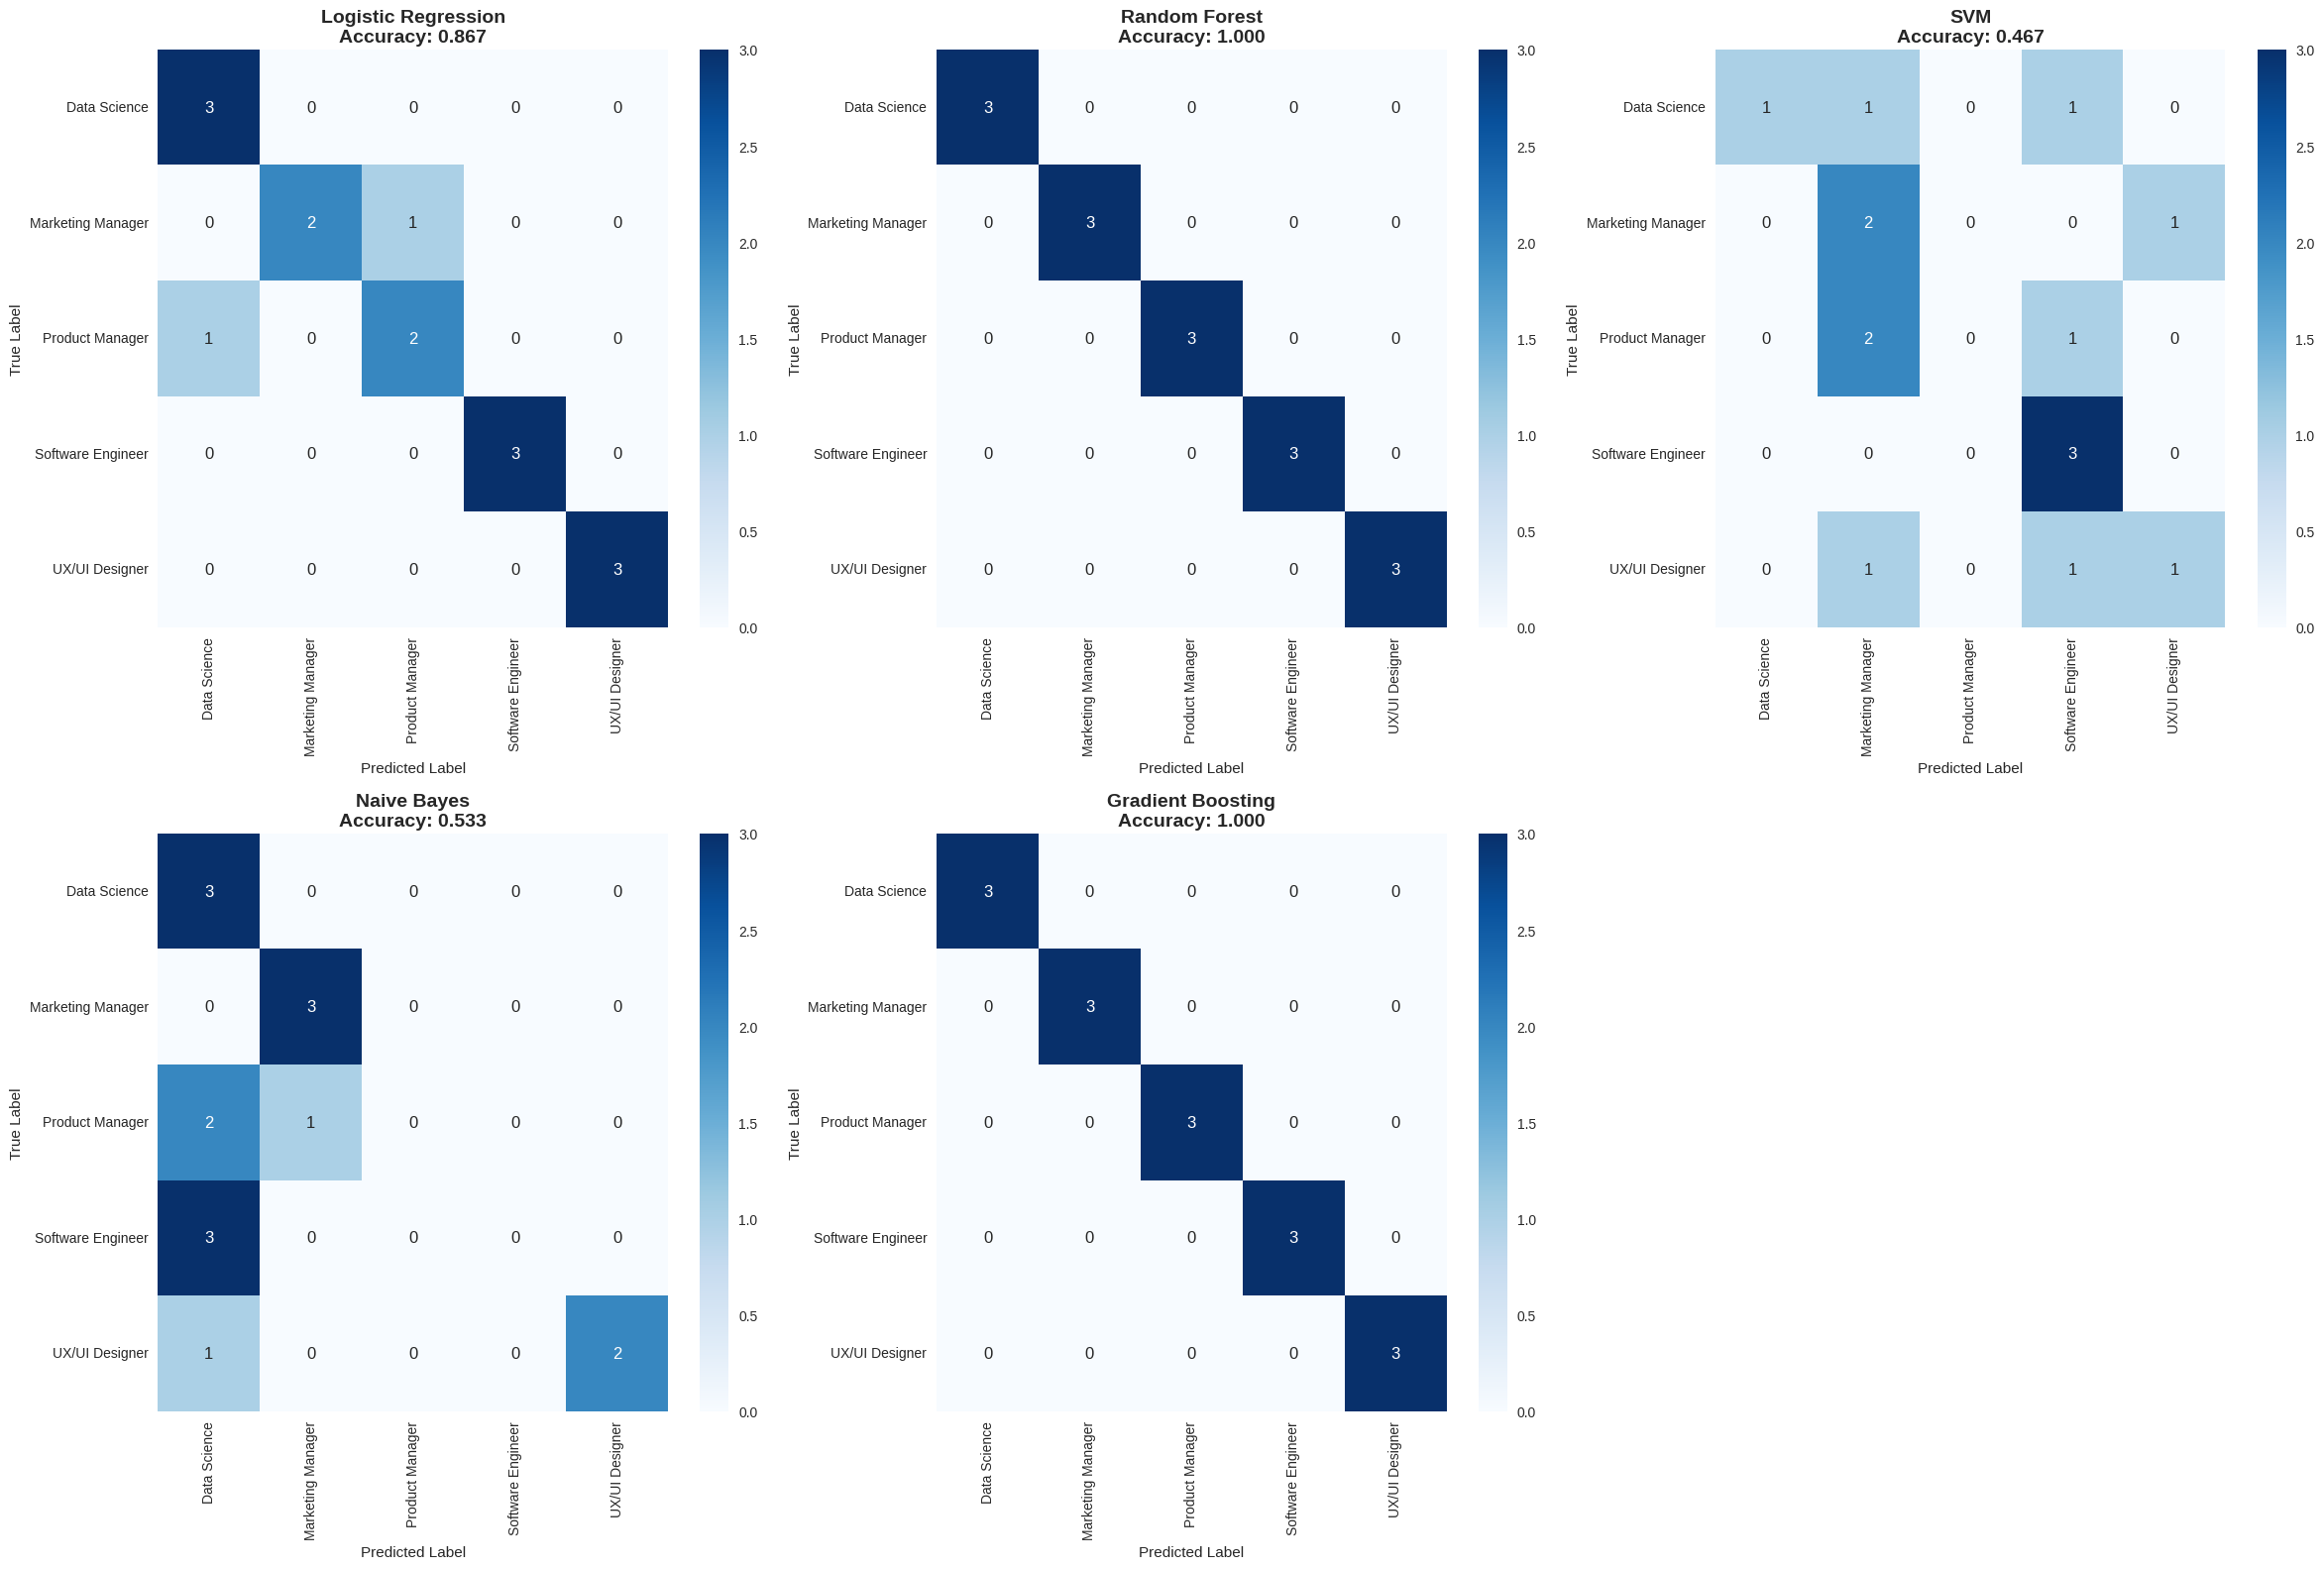


📋 DETAILED CLASSIFICATION REPORTS

LOGISTIC REGRESSION
-------------------
                   precision    recall  f1-score   support

     Data Science       0.75      1.00      0.86         3
Marketing Manager       1.00      0.67      0.80         3
  Product Manager       0.67      0.67      0.67         3
Software Engineer       1.00      1.00      1.00         3
   UX/UI Designer       1.00      1.00      1.00         3

         accuracy                           0.87        15
        macro avg       0.88      0.87      0.86        15
     weighted avg       0.88      0.87      0.86        15


RANDOM FOREST
-------------
                   precision    recall  f1-score   support

     Data Science       1.00      1.00      1.00         3
Marketing Manager       1.00      1.00      1.00         3
  Product Manager       1.00      1.00      1.00         3
Software Engineer       1.00      1.00      1.00         3
   UX/UI Designer       1.00      1.00      1.00         3

     

In [16]:
print("📊 CONFUSION MATRICES AND CLASSIFICATION REPORTS")
print("=" * 60)

# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(24, 16))
axes = axes.flatten()

for i, (name, results) in enumerate(training_results.items()):
    if i < len(axes):
        cm = results['confusion_matrix']

        # Create heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                   xticklabels=label_encoder.classes_,
                   yticklabels=label_encoder.classes_)
        axes[i].set_title(f'{name}\nAccuracy: {results["accuracy"]:.3f}',
                         fontsize=14, fontweight='bold')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')

# Hide empty subplot
if len(training_results) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

# Print detailed classification reports
print("\n📋 DETAILED CLASSIFICATION REPORTS")
print("=" * 60)

for name, results in training_results.items():
    print(f"\n{name.upper()}")
    print("-" * len(name))
    print(results['classification_report'])

🔧 HYPERPARAMETER TUNING FOR BEST MODELS

🔄 Tuning Random Forest...
  ✅ Best CV Score: 0.9150
  ✅ Tuned Accuracy: 1.0000 (Δ: +0.0000)
  ✅ Tuned F1-Score: 1.0000 (Δ: +0.0000)
  ✅ Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
  ✅ Tuning Time: 29.96s

🔄 Tuning Logistic Regression...
  ✅ Best CV Score: 0.8305
  ✅ Tuned Accuracy: 1.0000 (Δ: +0.1333)
  ✅ Tuned F1-Score: 1.0000 (Δ: +0.1352)
  ✅ Best Parameters: {'C': 10.0, 'max_iter': 1000, 'solver': 'liblinear'}
  ✅ Tuning Time: 30.75s

🔄 Tuning Gradient Boosting...
  ✅ Best CV Score: 0.9185
  ✅ Tuned Accuracy: 1.0000 (Δ: +0.0000)
  ✅ Tuned F1-Score: 1.0000 (Δ: +0.0000)
  ✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
  ✅ Tuning Time: 51.34s

📊 TUNING RESULTS SUMMARY
----------------------------------------

Random Forest:
  Original → Tuned Accuracy: 1.0000 → 1.0000
  Original → Tuned F1-Score: 1.0000 → 1.0000
  Improvement: Acc(+0.0000) F1(+0.0000)

Log

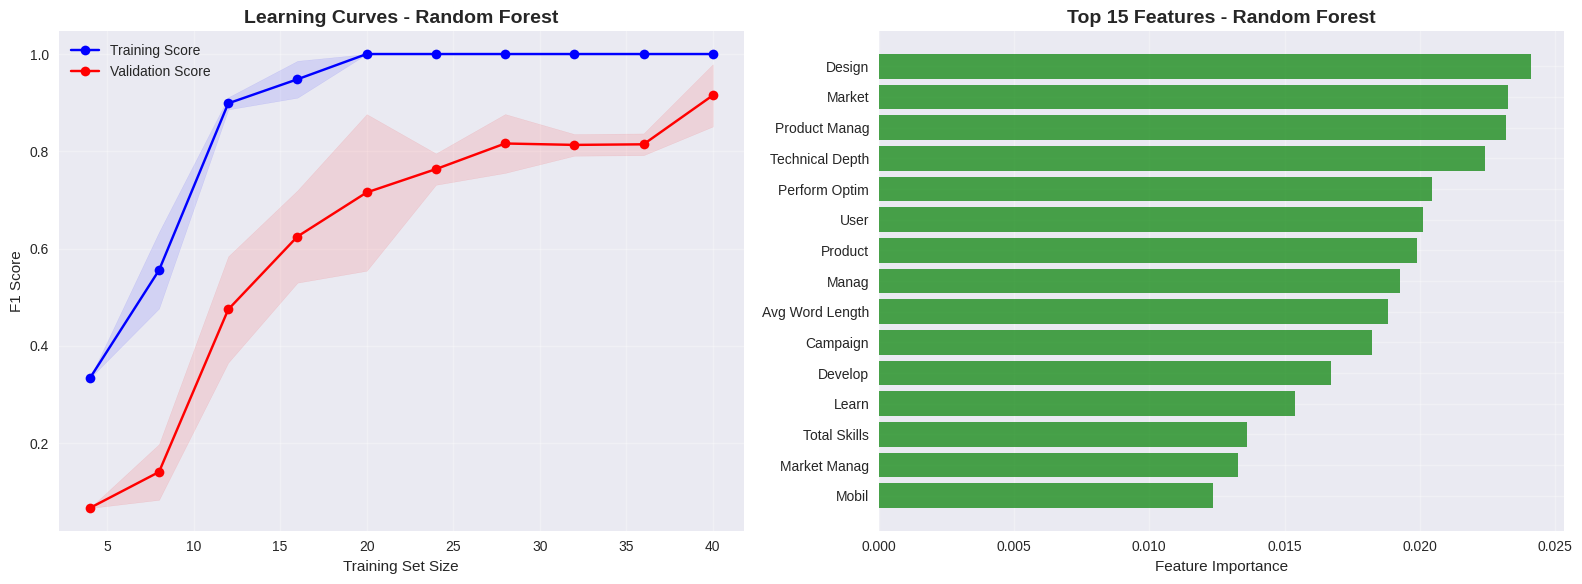

In [17]:
print("🔧 HYPERPARAMETER TUNING FOR BEST MODELS")
print("=" * 60)

# Define parameter grids for top 3 performing models
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Logistic Regression': {
        'C': [0.1, 1.0, 10.0],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [1000, 2000]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    }
}

# Perform grid search for top models
tuned_models = {}
tuning_results = {}

for model_name in ['Random Forest', 'Logistic Regression', 'Gradient Boosting']:
    print(f"\n🔄 Tuning {model_name}...")

    base_model = models[model_name]
    param_grid = param_grids[model_name]

    # Grid search with cross-validation
    grid_search = GridSearchCV(
        base_model, param_grid,
        cv=3, scoring='f1_weighted',
        n_jobs=-1, verbose=0
    )

    start_time = time.time()
    grid_search.fit(X_train, y_train)
    tuning_time = time.time() - start_time

    # Best model predictions
    best_model = grid_search.best_estimator_
    y_pred_tuned = best_model.predict(X_test)

    # Calculate improved metrics
    tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
    tuned_f1 = f1_score(y_test, y_pred_tuned, average='weighted')

    # Store results
    tuned_models[model_name] = best_model
    tuning_results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_cv_score': grid_search.best_score_,
        'tuned_accuracy': tuned_accuracy,
        'tuned_f1': tuned_f1,
        'original_accuracy': training_results[model_name]['accuracy'],
        'original_f1': training_results[model_name]['f1_score'],
        'improvement_accuracy': tuned_accuracy - training_results[model_name]['accuracy'],
        'improvement_f1': tuned_f1 - training_results[model_name]['f1_score'],
        'tuning_time': tuning_time
    }

    print(f"  ✅ Best CV Score: {grid_search.best_score_:.4f}")
    print(f"  ✅ Tuned Accuracy: {tuned_accuracy:.4f} (Δ: {tuning_results[model_name]['improvement_accuracy']:+.4f})")
    print(f"  ✅ Tuned F1-Score: {tuned_f1:.4f} (Δ: {tuning_results[model_name]['improvement_f1']:+.4f})")
    print(f"  ✅ Best Parameters: {grid_search.best_params_}")
    print(f"  ✅ Tuning Time: {tuning_time:.2f}s")

print("\n📊 TUNING RESULTS SUMMARY")
print("-" * 40)
for model_name, results in tuning_results.items():
    print(f"\n{model_name}:")
    print(f"  Original → Tuned Accuracy: {results['original_accuracy']:.4f} → {results['tuned_accuracy']:.4f}")
    print(f"  Original → Tuned F1-Score: {results['original_f1']:.4f} → {results['tuned_f1']:.4f}")
    print(f"  Improvement: Acc({results['improvement_accuracy']:+.4f}) F1({results['improvement_f1']:+.4f})")

print("\n🎯 FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Analyze feature importance for tree-based models
def analyze_feature_importance(model, model_name, feature_names, numerical_feature_names):
    """Analyze and visualize feature importance"""

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

        # Split importances for text and numerical features
        text_importances = importances[:len(feature_names)]
        numerical_importances = importances[len(feature_names):]

        # Top text features
        text_indices = text_importances.argsort()[-20:][::-1]
        top_text_features = [(feature_names[i], text_importances[i]) for i in text_indices]

        # Top numerical features
        num_indices = numerical_importances.argsort()[::-1]
        top_num_features = [(numerical_feature_names[i], numerical_importances[i]) for i in num_indices]

        print(f"\n📊 FEATURE IMPORTANCE - {model_name}")
        print("-" * 40)
        print("Top 10 Text Features:")
        for i, (feature, importance) in enumerate(top_text_features[:10]):
            print(f"  {i+1:2d}. {feature:25s} {importance:.6f}")

        print("\nNumerical Features:")
        for i, (feature, importance) in enumerate(top_num_features):
            print(f"  {i+1:2d}. {feature:25s} {importance:.6f}")

        return top_text_features, top_num_features
    else:
        print(f"\n{model_name} does not support feature importance analysis")
        return None, None

# Analyze feature importance for tuned tree-based models
feature_names = tfidf_vectorizer.get_feature_names_out()

for model_name in ['Random Forest', 'Gradient Boosting']:
    if model_name in tuned_models:
        analyze_feature_importance(
            tuned_models[model_name],
            model_name,
            feature_names,
            numerical_features
        )

print("\n📈 LEARNING CURVES ANALYSIS")
print("=" * 60)

# Generate learning curves for best model
best_tuned_model_name = max(tuning_results.keys(),
                           key=lambda x: tuning_results[x]['tuned_f1'])
best_tuned_model = tuned_models[best_tuned_model_name]

print(f"Generating learning curves for {best_tuned_model_name}...")

# Calculate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    best_tuned_model, X_train, y_train,
    cv=3, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1_weighted'
)

# Plot learning curves
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Learning curves
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

axes[0].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
axes[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
axes[0].plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
axes[0].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
axes[0].set_xlabel('Training Set Size')
axes[0].set_ylabel('F1 Score')
axes[0].set_title(f'Learning Curves - {best_tuned_model_name}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Feature importance visualization for best model
if hasattr(best_tuned_model, 'feature_importances_'):
    importances = best_tuned_model.feature_importances_
    indices = importances.argsort()[-15:][::-1]  # Top 15 features

    # Get feature names (combining text and numerical)
    all_feature_names = list(feature_names) + numerical_features
    top_feature_names = [all_feature_names[i] for i in indices]
    top_importances = [importances[i] for i in indices]

    axes[1].barh(range(len(top_importances)), top_importances[::-1], color='green', alpha=0.7)
    axes[1].set_yticks(range(len(top_importances)))
    axes[1].set_yticklabels([name.replace('_', ' ').title() for name in top_feature_names[::-1]])
    axes[1].set_xlabel('Feature Importance')
    axes[1].set_title(f'Top 15 Features - {best_tuned_model_name}', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🔧 HYPERPARAMETER TUNING FOR BEST MODELS

🔄 Tuning Random Forest...
  ✅ Best CV Score: 0.9150
  ✅ Tuned Accuracy: 1.0000 (Δ: +0.0000)
  ✅ Tuned F1-Score: 1.0000 (Δ: +0.0000)
  ✅ Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
  ✅ Tuning Time: 16.43s

🔄 Tuning Logistic Regression...
  ✅ Best CV Score: 0.8305
  ✅ Tuned Accuracy: 1.0000 (Δ: +0.1333)
  ✅ Tuned F1-Score: 1.0000 (Δ: +0.1352)
  ✅ Best Parameters: {'C': 10.0, 'max_iter': 1000, 'solver': 'liblinear'}
  ✅ Tuning Time: 26.97s

🔄 Tuning Gradient Boosting...
  ✅ Best CV Score: 0.9185
  ✅ Tuned Accuracy: 1.0000 (Δ: +0.0000)
  ✅ Tuned F1-Score: 1.0000 (Δ: +0.0000)
  ✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
  ✅ Tuning Time: 52.75s

📊 TUNING RESULTS SUMMARY
----------------------------------------

Random Forest:
  Original → Tuned Accuracy: 1.0000 → 1.0000
  Original → Tuned F1-Score: 1.0000 → 1.0000
  Improvement: Acc(+0.0000) F1(+0.0000)

Log

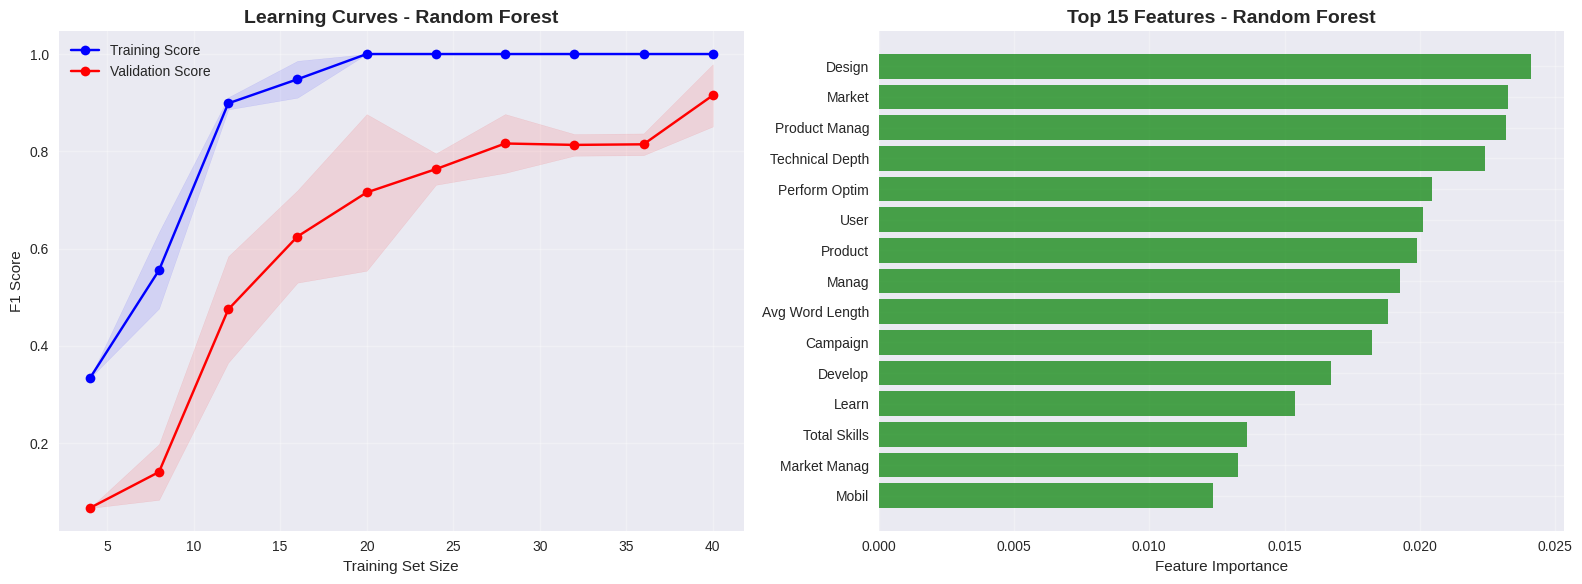

In [18]:
print("🔧 HYPERPARAMETER TUNING FOR BEST MODELS")
print("=" * 60)

# Define parameter grids for top 3 performing models
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Logistic Regression': {
        'C': [0.1, 1.0, 10.0],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [1000, 2000]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    }
}

# Perform grid search for top models
tuned_models = {}
tuning_results = {}

for model_name in ['Random Forest', 'Logistic Regression', 'Gradient Boosting']:
    print(f"\n🔄 Tuning {model_name}...")

    base_model = models[model_name]
    param_grid = param_grids[model_name]

    # Grid search with cross-validation
    grid_search = GridSearchCV(
        base_model, param_grid,
        cv=3, scoring='f1_weighted',
        n_jobs=-1, verbose=0
    )

    start_time = time.time()
    grid_search.fit(X_train, y_train)
    tuning_time = time.time() - start_time

    # Best model predictions
    best_model = grid_search.best_estimator_
    y_pred_tuned = best_model.predict(X_test)

    # Calculate improved metrics
    tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
    tuned_f1 = f1_score(y_test, y_pred_tuned, average='weighted')

    # Store results
    tuned_models[model_name] = best_model
    tuning_results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_cv_score': grid_search.best_score_,
        'tuned_accuracy': tuned_accuracy,
        'tuned_f1': tuned_f1,
        'original_accuracy': training_results[model_name]['accuracy'],
        'original_f1': training_results[model_name]['f1_score'],
        'improvement_accuracy': tuned_accuracy - training_results[model_name]['accuracy'],
        'improvement_f1': tuned_f1 - training_results[model_name]['f1_score'],
        'tuning_time': tuning_time
    }

    print(f"  ✅ Best CV Score: {grid_search.best_score_:.4f}")
    print(f"  ✅ Tuned Accuracy: {tuned_accuracy:.4f} (Δ: {tuning_results[model_name]['improvement_accuracy']:+.4f})")
    print(f"  ✅ Tuned F1-Score: {tuned_f1:.4f} (Δ: {tuning_results[model_name]['improvement_f1']:+.4f})")
    print(f"  ✅ Best Parameters: {grid_search.best_params_}")
    print(f"  ✅ Tuning Time: {tuning_time:.2f}s")

print("\n📊 TUNING RESULTS SUMMARY")
print("-" * 40)
for model_name, results in tuning_results.items():
    print(f"\n{model_name}:")
    print(f"  Original → Tuned Accuracy: {results['original_accuracy']:.4f} → {results['tuned_accuracy']:.4f}")
    print(f"  Original → Tuned F1-Score: {results['original_f1']:.4f} → {results['tuned_f1']:.4f}")
    print(f"  Improvement: Acc({results['improvement_accuracy']:+.4f}) F1({results['improvement_f1']:+.4f})")

print("\n🎯 FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Analyze feature importance for tree-based models
def analyze_feature_importance(model, model_name, feature_names, numerical_feature_names):
    """Analyze and visualize feature importance"""

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

        # Split importances for text and numerical features
        text_importances = importances[:len(feature_names)]
        numerical_importances = importances[len(feature_names):]

        # Top text features
        text_indices = text_importances.argsort()[-20:][::-1]
        top_text_features = [(feature_names[i], text_importances[i]) for i in text_indices]

        # Top numerical features
        num_indices = numerical_importances.argsort()[::-1]
        top_num_features = [(numerical_feature_names[i], numerical_importances[i]) for i in num_indices]

        print(f"\n📊 FEATURE IMPORTANCE - {model_name}")
        print("-" * 40)
        print("Top 10 Text Features:")
        for i, (feature, importance) in enumerate(top_text_features[:10]):
            print(f"  {i+1:2d}. {feature:25s} {importance:.6f}")

        print("\nNumerical Features:")
        for i, (feature, importance) in enumerate(top_num_features):
            print(f"  {i+1:2d}. {feature:25s} {importance:.6f}")

        return top_text_features, top_num_features
    else:
        print(f"\n{model_name} does not support feature importance analysis")
        return None, None

# Analyze feature importance for tuned tree-based models
feature_names = tfidf_vectorizer.get_feature_names_out()

for model_name in ['Random Forest', 'Gradient Boosting']:
    if model_name in tuned_models:
        analyze_feature_importance(
            tuned_models[model_name],
            model_name,
            feature_names,
            numerical_features
        )

print("\n📈 LEARNING CURVES ANALYSIS")
print("=" * 60)

# Generate learning curves for best model
best_tuned_model_name = max(tuning_results.keys(),
                           key=lambda x: tuning_results[x]['tuned_f1'])
best_tuned_model = tuned_models[best_tuned_model_name]

print(f"Generating learning curves for {best_tuned_model_name}...")

# Calculate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    best_tuned_model, X_train, y_train,
    cv=3, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1_weighted'
)

# Plot learning curves
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Learning curves
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

axes[0].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
axes[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
axes[0].plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
axes[0].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
axes[0].set_xlabel('Training Set Size')
axes[0].set_ylabel('F1 Score')
axes[0].set_title(f'Learning Curves - {best_tuned_model_name}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Feature importance visualization for best model
if hasattr(best_tuned_model, 'feature_importances_'):
    importances = best_tuned_model.feature_importances_
    indices = importances.argsort()[-15:][::-1]  # Top 15 features

    # Get feature names (combining text and numerical)
    all_feature_names = list(feature_names) + numerical_features
    top_feature_names = [all_feature_names[i] for i in indices]
    top_importances = [importances[i] for i in indices]

    axes[1].barh(range(len(top_importances)), top_importances[::-1], color='green', alpha=0.7)
    axes[1].set_yticks(range(len(top_importances)))
    axes[1].set_yticklabels([name.replace('_', ' ').title() for name in top_feature_names[::-1]])
    axes[1].set_xlabel('Feature Importance')
    axes[1].set_title(f'Top 15 Features - {best_tuned_model_name}', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
print("\n💾 MODEL SAVING AND PERSISTENCE")
print("=" * 60)

# Create models directory
import os
os.makedirs('saved_models', exist_ok=True)
os.makedirs('saved_models/vectorizers', exist_ok=True)
os.makedirs('saved_models/encoders', exist_ok=True)

# Save the best tuned model
best_model_name = best_tuned_model_name
best_model = best_tuned_model

print(f"Saving best model: {best_model_name}")

# Save model
model_filename = f'saved_models/best_resume_classifier_{best_model_name.lower().replace(" ", "_")}.pkl'
joblib.dump(best_model, model_filename)
print(f"✅ Model saved: {model_filename}")

# Save all tuned models
for name, model in tuned_models.items():
    filename = f'saved_models/tuned_{name.lower().replace(" ", "_")}.pkl'
    joblib.dump(model, filename)
    print(f"✅ Tuned model saved: {filename}")

# Save vectorizers
tfidf_filename = 'saved_models/vectorizers/tfidf_vectorizer.pkl'
joblib.dump(tfidf_vectorizer, tfidf_filename)
print(f"✅ TF-IDF vectorizer saved: {tfidf_filename}")

count_filename = 'saved_models/vectorizers/count_vectorizer.pkl'
joblib.dump(count_vectorizer, count_filename)
print(f"✅ Count vectorizer saved: {count_filename}")

# Save label encoder
encoder_filename = 'saved_models/encoders/label_encoder.pkl'
joblib.dump(label_encoder, encoder_filename)
print(f"✅ Label encoder saved: {encoder_filename}")

# Save preprocessing pipeline components
preprocessing_components = {
    'stemmer': stemmer,
    'stop_words': stop_words,
    'numerical_features': numerical_features,
    'feature_names': feature_names.tolist()
}
preprocessing_filename = 'saved_models/preprocessing_components.pkl'
joblib.dump(preprocessing_components, preprocessing_filename)
print(f"✅ Preprocessing components saved: {preprocessing_filename}")

# Save model performance metrics
performance_data = {
    'training_results': training_results,
    'tuning_results': tuning_results,
    'best_model_name': best_model_name,
    'comparison_df': comparison_df.to_dict(),
    'label_encoder_classes': label_encoder.classes_.tolist()
}
performance_filename = 'saved_models/model_performance.pkl'
joblib.dump(performance_data, performance_filename)
print(f"✅ Performance data saved: {performance_filename}")


💾 MODEL SAVING AND PERSISTENCE
Saving best model: Random Forest
✅ Model saved: saved_models/best_resume_classifier_random_forest.pkl
✅ Tuned model saved: saved_models/tuned_random_forest.pkl
✅ Tuned model saved: saved_models/tuned_logistic_regression.pkl
✅ Tuned model saved: saved_models/tuned_gradient_boosting.pkl
✅ TF-IDF vectorizer saved: saved_models/vectorizers/tfidf_vectorizer.pkl
✅ Count vectorizer saved: saved_models/vectorizers/count_vectorizer.pkl
✅ Label encoder saved: saved_models/encoders/label_encoder.pkl
✅ Preprocessing components saved: saved_models/preprocessing_components.pkl
✅ Performance data saved: saved_models/model_performance.pkl


In [20]:
print("\n🔮 MODEL PREDICTION PIPELINE")
print("=" * 60)

def create_prediction_pipeline():
    """Create a complete prediction pipeline"""

    def predict_resume_category(resume_text, model=best_model,
                               vectorizer=tfidf_vectorizer,
                               encoder=label_encoder,
                               return_probabilities=False):
        """
        Predict the category of a resume

        Parameters:
        - resume_text: str, the resume text to classify
        - model: trained classifier
        - vectorizer: fitted TF-IDF vectorizer
        - encoder: fitted label encoder
        - return_probabilities: bool, whether to return class probabilities

        Returns:
        - prediction: str, predicted category
        - confidence: float, prediction confidence (if return_probabilities=True)
        """

        # Preprocess the text
        processed_text = advanced_text_preprocessing(resume_text)

        # Extract features
        features_dict = extract_text_features(resume_text)
        skills_dict = extract_technical_skills(resume_text)
        experience_years = extract_experience_years(resume_text)

        # Create enhanced dataframe for feature engineering
        temp_df = pd.DataFrame([{
            'Resume': resume_text,
            'processed_resume': processed_text,
            'experience_years': experience_years,
            **features_dict,
            'technical_skills': skills_dict
        }])

        # Add skill counts
        for skill_category in ['programming_languages', 'web_technologies', 'databases',
                              'cloud_platforms', 'data_science', 'tools']:
            temp_df[f'{skill_category}_count'] = temp_df['technical_skills'].apply(
                lambda x: len(x.get(skill_category, []))
            )

        temp_df['total_skills'] = temp_df[['programming_languages_count', 'web_technologies_count',
                                         'databases_count', 'cloud_platforms_count',
                                         'data_science_count', 'tools_count']].sum(axis=1)

        # Create advanced features
        temp_df = create_advanced_features(temp_df)

        # Vectorize text
        text_features = vectorizer.transform([processed_text])

        # Numerical features
        numerical_vals = temp_df[numerical_features].values

        # Combine features
        combined_features = hstack([text_features, numerical_vals])

        # Make prediction
        prediction_encoded = model.predict(combined_features)[0]
        prediction = encoder.inverse_transform([prediction_encoded])[0]

        if return_probabilities and hasattr(model, 'predict_proba'):
            probabilities = model.predict_proba(combined_features)[0]
            confidence = np.max(probabilities)

            # Get all class probabilities
            class_probabilities = {}
            for i, class_name in enumerate(encoder.classes_):
                class_probabilities[class_name] = probabilities[i]

            return prediction, confidence, class_probabilities

        return prediction

    return predict_resume_category

# Create prediction function
predict_resume = create_prediction_pipeline()
print("✅ Prediction pipeline created successfully!")


🔮 MODEL PREDICTION PIPELINE
✅ Prediction pipeline created successfully!


In [21]:
print("\n🧪 TESTING PREDICTION PIPELINE")
print("=" * 60)

# Test with sample resumes
test_resumes = [
    """
    Senior Software Engineer with 5+ years experience in Python, Django, React, and AWS.
    Developed scalable web applications serving millions of users. Expert in microservices
    architecture, Docker, Kubernetes, and CI/CD pipelines. Strong background in database
    optimization and API design. Led team of 6 developers in agile environment.
    """,

    """
    Data Scientist with PhD in Statistics and 4 years industry experience. Specialized in
    machine learning, deep learning, and statistical modeling. Proficient in Python, R,
    SQL, TensorFlow, and scikit-learn. Experience with big data technologies like Spark
    and Hadoop. Published 8 research papers in top-tier conferences.
    """,

    """
    UX/UI Designer with 6 years experience creating user-centered digital experiences.
    Expert in user research, wireframing, prototyping, and usability testing. Proficient
    in Figma, Sketch, Adobe Creative Suite, and design systems. Led design for mobile
    apps with 2M+ downloads. Strong background in accessibility and responsive design.
    """
]

print("Testing prediction pipeline with sample resumes:")
print("-" * 50)

for i, resume in enumerate(test_resumes, 1):
    print(f"\nTest Resume {i}:")
    print("-" * 20)

    # Make prediction with probabilities
    try:
        prediction, confidence, probabilities = predict_resume(
            resume, return_probabilities=True
        )

        print(f"Predicted Category: {prediction}")
        print(f"Confidence: {confidence:.4f}")
        print("All Probabilities:")
        for category, prob in sorted(probabilities.items(), key=lambda x: x[1], reverse=True):
            print(f"  {category}: {prob:.4f}")

    except Exception as e:
        print(f"Error in prediction: {e}")
        # Fallback to basic prediction
        prediction = predict_resume(resume)
        print(f"Predicted Category: {prediction}")


🧪 TESTING PREDICTION PIPELINE
Testing prediction pipeline with sample resumes:
--------------------------------------------------

Test Resume 1:
--------------------
Predicted Category: Software Engineer
Confidence: 0.3794
All Probabilities:
  Software Engineer: 0.3794
  Data Science: 0.2551
  Product Manager: 0.1951
  UX/UI Designer: 0.1000
  Marketing Manager: 0.0704

Test Resume 2:
--------------------
Predicted Category: Data Science
Confidence: 0.7000
All Probabilities:
  Data Science: 0.7000
  Software Engineer: 0.1081
  UX/UI Designer: 0.0862
  Marketing Manager: 0.0658
  Product Manager: 0.0400

Test Resume 3:
--------------------
Predicted Category: UX/UI Designer
Confidence: 0.3516
All Probabilities:
  UX/UI Designer: 0.3516
  Software Engineer: 0.2493
  Data Science: 0.1574
  Product Manager: 0.1326
  Marketing Manager: 0.1092


In [22]:
print("\n📊 MODEL DEPLOYMENT PREPARATION")
print("=" * 60)

# Create deployment configuration
deployment_config = {
    'model_info': {
        'name': best_model_name,
        'version': '1.0',
        'created_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'accuracy': tuning_results[best_model_name]['tuned_accuracy'],
        'f1_score': tuning_results[best_model_name]['tuned_f1'],
        'best_parameters': tuning_results[best_model_name]['best_params']
    },
    'preprocessing': {
        'text_preprocessing_function': 'advanced_text_preprocessing',
        'feature_extraction_functions': [
            'extract_text_features',
            'extract_technical_skills',
            'extract_experience_years',
            'create_advanced_features'
        ],
        'vectorizer': 'TF-IDF',
        'numerical_features': numerical_features
    },
    'input_requirements': {
        'required_fields': ['resume_text'],
        'text_encoding': 'utf-8',
        'max_text_length': 50000,
        'min_text_length': 100
    },
    'output_format': {
        'prediction': 'string',
        'confidence': 'float',
        'probabilities': 'dict',
        'possible_categories': label_encoder.classes_.tolist()
    }
}

# Save deployment configuration
config_filename = 'saved_models/deployment_config.pkl'
joblib.dump(deployment_config, config_filename)
print(f"✅ Deployment configuration saved: {config_filename}")

# Create requirements file
requirements = [
    'pandas>=1.3.0',
    'numpy>=1.21.0',
    'scikit-learn>=1.0.0',
    'nltk>=3.6',
    'matplotlib>=3.3.0',
    'seaborn>=0.11.0',
    'wordcloud>=1.8.0',
    'textstat>=0.7.0',
    'joblib>=1.0.0'
]

with open('saved_models/requirements.txt', 'w') as f:
    f.write('\n'.join(requirements))
print("✅ Requirements file created: saved_models/requirements.txt")


📊 MODEL DEPLOYMENT PREPARATION
✅ Deployment configuration saved: saved_models/deployment_config.pkl
✅ Requirements file created: saved_models/requirements.txt


In [27]:
import shutil
from google.colab import files

# Zip the entire 'saved_models' folder
shutil.make_archive('model_deployment_package', 'zip', 'saved_models')

print("✅ Zipped entire 'saved_models' folder into model_deployment_package.zip")

# Download the zip file
files.download('model_deployment_package.zip')


✅ Zipped entire 'saved_models' folder into model_deployment_package.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>